In [2]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx # Para o basemap

In [4]:
# Corrigir IDs duplicados no arquivo GeoJSON
def carregar_geojson_eficiente():
    caminho_arquivo = "censo_arboreo.geojson"
    # Simplesmente use geopandas.read_file
    df = gpd.read_file(caminho_arquivo)
    return df

def carregar_bairros():
    caminho_arquivo_bairros = "bairros.geojson"
    gdf_bairros = gpd.read_file(caminho_arquivo_bairros)
    return gdf_bairros

print("carregamento iniciado...")
df = carregar_geojson_eficiente()
gdf_bairros = carregar_bairros()
print("carregamento finalizado!")


carregamento iniciado...
carregamento finalizado!
carregamento finalizado!


In [5]:
print(f"CRS original dos Bairros: {gdf_bairros.crs}")
print(f"CRS original das Árvores (df): {df.crs}")
gdf_bairros = gdf_bairros.to_crs(epsg=3857)
df = df.to_crs(epsg=3857)
print(f"CRS original dos Bairros: {gdf_bairros.crs}")
print(f"CRS original das Árvores (df): {df.crs}")

CRS original dos Bairros: EPSG:4326
CRS original das Árvores (df): EPSG:31985
CRS original dos Bairros: EPSG:3857
CRS original das Árvores (df): EPSG:3857
CRS original dos Bairros: EPSG:3857
CRS original das Árvores (df): EPSG:3857


In [6]:
bairros_siglas = df["bairro"].unique()
bairros_siglas_list = bairros_siglas.tolist()
bairros_siglas_list.remove(None)  
bairros_siglas_list.sort()# Remove valores None, se houver
print(len(bairros_siglas_list))

94


In [7]:
dados_bairros = {
    'Sigla': [
        'ADM', 'AFG', 'AFT', 'AGF', 'AJB', 'AJP', 'APP', 'ARE', 'ARR', 'AST', 
        'BAR', 'BBE', 'BBH', 'BEB', 'BGU', 'BNG', 'BRT', 'BVG', 'BVS', 'CAJ', 
        'CAX', 'CBG', 'CCT', 'CDB', 'CDU', 'CHB', 'CJE', 'CMG', 'COE', 'COQ', 
        'CRD', 'CSA', 'CSF', 'CUR', 'DBY', 'DIR', 'DUN', 'ENC', 'ENG', 'ESP', 
        'EST', 'FUN', 'GRA', 'GUA', 'HIP', 'IBU', 'IJB', 'ILT', 'IMB', 'IPS', 
        'IPU', 'IRE', 'JAQ', 'JIQ', 'JOR', 'JSP', 'LTR', 'MAC', 'MAD', 'MCO', 
        'MGA', 'MGE', 'MON', 'MUS', 'NOV', 'PAI', 'PAR', 'PAS', 'PAU', 'PEI', 
        'PIN', 'POC', 'POP', 'PRA', 'PTM', 'REC', 'RSA', 'SAM', 'SAT', 'SDP', 
        'SJE', 'SLD', 'SMT', 'SNC', 'STN', 'TAO', 'TEJ', 'TES', 'TMA', 'TOT', 
        'TRR', 'VCG', 'VRZ', 'ZMB'
    ],
    'Bairro': [
        'Alto do Mandu', 'Afogados', 'Aflitos', 'Água Fria', 'Alto José Bonifácio', 
        'Alto José do Pinho', 'Apipucos', 'Areias', 'Arruda', 'Alto Santa Terezinha',
        'Barro', 'Beberibe', 'Bomba do Hemetério', 'Brejo de Beberibe', 
        'Brejo da Guabiraba', 'Bongi', 'Brasília Teimosa', 'Boa Viagem', 'Boa Vista',
        'Cajueiro', 'Caxangá', 'Cabanga', 'Caçote', 'Campina do Barreto', 
        'Cidade Universitária', 'Cohab', 'Córrego do Jenipapo', 'Campo Grande', 
        'Coelhos', 'Coqueiral', 'Cordeiro', 'Casa Amarela', 'Casa Forte', 'Curado',
        'Derby', 'Dois Irmãos', 'Dois Unidos', 'Encruzilhada', 'Engenho do Meio',
        'Espinheiro', 'Estância', 'Fundão', 'Graças', 'Guabiraba', 'Hipódromo',
        'Ibura', 'Ilha Joana Bezerra', 'Ilha do Leite', 'Imbiribeira', 'Ipsep',
        'Iputinga', 'Ilha do Retiro', 'Jaqueira', 'Jiquiá', 'Jordão', 
        'Jardim São Paulo', 'Linha do Tiro', 'Macaxeira', 'Madalena', 
        'Morro da Conceição', 'Mangabeira', 'Mangueira', 'Monteiro', 'Mustardinha',
        'Nova Descoberta', 'Paissandu', 'Parnamirim', 'Passarinho', 'Pau Ferro',
        'Peixinhos', 'Pina', 'Poço', 'Ponto de Parada', 'Prado', 'Porto da Madeira',
        'Recife', 'Rosarinho', 'Santo Amaro', 'Santo Antônio', 'Sítio dos Pintos',
        'São José', 'Soledade', 'San Martin', 'Sancho', 'Santana', 'Torreão',
        'Tejipió', 'Torre', 'Tamarineira', 'Totó', 'Torrões', 'Vasco da Gama',
        'Várzea', 'Zumbi'
    ]
}

In [8]:
# Adicionar uma coluna ao DataFrame com os bairros correspondentes às siglas
sigla_para_bairro = dict(zip(dados_bairros['Sigla'], dados_bairros['Bairro']))
df['bairro_nome'] = df['bairro'].map(sigla_para_bairro)
print(df[['bairro', 'bairro_nome']].head())

  bairro  bairro_nome
0    GUA    Guabiraba
1    MAC    Macaxeira
2   None          NaN
3    SAM  Santo Amaro
4    IPU     Iputinga


In [9]:
df.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 259575 entries, 0 to 259574
Data columns (total 56 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   objectid     259575 non-null  int32         
 1   tipo_ponto   259575 non-null  object        
 2   porte_esp    14400 non-null   object        
 3   bairro       259492 non-null  object        
 4   rpa          259575 non-null  int32         
 5   x            259575 non-null  float64       
 6   y            259575 non-null  float64       
 7   nome_popul   1364 non-null    object        
 8   categoria_   2127 non-null    object        
 9   obs          211919 non-null  object        
 10  created_us   636 non-null     object        
 11  created_da   2480 non-null    datetime64[ms]
 12  last_edite   169 non-null     object        
 13  last_edi_1   169 non-null     datetime64[ms]
 14  tipologia    463 non-null     object        
 15  idlote       18 non-null  

In [10]:
# Definir as colunas que vamos usar
colunas_selecionadas = [
    'porte_esp',
    'rpa',
    'nome_popul',
    'tipologia',
    'copa',
    'altura',
    'cap',
    'dap',
    'geometry',
    'bairro_nome'
]

# Verificar quais colunas existem no DataFrame
colunas_existentes = [col for col in colunas_selecionadas if col in df.columns]
colunas_faltando = [col for col in colunas_selecionadas if col not in df.columns]

if colunas_faltando:
    print(f"⚠️  Colunas não encontradas no DataFrame: {colunas_faltando}")

# DataFrame com as colunas que vamos usar
df_usado = df[colunas_existentes].copy()

# DataFrame com as colunas que não vamos usar
colunas_descartadas = [col for col in df.columns if col not in colunas_existentes]
df_descartado = df[colunas_descartadas].copy()

print(f"\n✅ DataFrame de colunas USADAS:")
print(f"   - {len(df_usado.columns)} colunas: {list(df_usado.columns)}")
print(f"   - {len(df_usado)} linhas\n")

print(f"📦 DataFrame de colunas DESCARTADAS:")
print(f"   - {len(df_descartado.columns)} colunas: {list(df_descartado.columns)}")
print(f"   - {len(df_descartado)} linhas\n")

df_usado


✅ DataFrame de colunas USADAS:
   - 10 colunas: ['porte_esp', 'rpa', 'nome_popul', 'tipologia', 'copa', 'altura', 'cap', 'dap', 'geometry', 'bairro_nome']
   - 259575 linhas

📦 DataFrame de colunas DESCARTADAS:
   - 46 colunas: ['objectid', 'tipo_ponto', 'bairro', 'x', 'y', 'categoria_', 'obs', 'created_us', 'created_da', 'last_edite', 'last_edi_1', 'idlote', 'origem', 'apermeavel', 'caracsolo', 'fiacaohorz', 'redesubter', 'postetrans', 'posteilumi', 'cruzamvias', 'eqpeqporte', 'rusticidad', 'processo', 'nomecienti', 'execucao', 'dataplanti', 'resptecnic', 'datamonito', 'invalidaca', 'injuria', 'fitossanid', 'x_wgs84', 'y_wgs84', 'created__1', 'created__2', 'last_edi_2', 'last_edi_3', 'nome_comum', 'nome_sp', 'globalid', 'projeto', 'responsave', 'contato', 'id', 'altfuste', 'corflor']
   - 259575 linhas



,porte_esp,rpa,nome_popul,tipologia,copa,altura,cap,dap,geometry,bairro_nome
0,None,3,None,None,0.0,0.0,0.0,0.00000,POINT (-3890403.21 -885668.925),Guabiraba
1,GP,3,None,UC,0.0,5.0,30.0,0.00000,POINT (-3888494.474 -895271.92),Macaxeira
2,GP,0,None,None,0.0,0.0,0.0,0.00000,POINT (-3882170.411 -900517.987),NaN
3,MP,1,Ipê-rosa,CC,0.0,1.8,0.0,0.00000,POINT (-3883312.685 -898253.656),Santo Amaro
4,MP,4,None,QU,1.0,3.2,1.0,0.31831,POINT (-3889349.335 -898736.882),Iputinga
...,...,...,...,...,...,...,...,...,...,...
259570,GP,0,None,None,0.0,3.5,17.0,0.00000,POINT (-3882358.885 -898921.784),NaN
259571,GP,0,None,None,0.0,3.5,17.0,0.00000,POINT (-3882330.347 -898916.764),NaN
259572,GP,0,None,None,0.0,2.7,13.0,0.00000,POINT (-3883138.257 -898395.868),NaN
259573,GP,0,None,None,0.0,2.5,10.0,0.00000,POINT (-3883144.352 -898393.283),NaN


In [11]:
# Análise de dados nulos e preenchidos no df_usado
total_cells = df_usado.size
total_null = df_usado.isnull().sum().sum()
total_filled = total_cells - total_null

pct_null = (total_null / total_cells) * 100
pct_filled = (total_filled / total_cells) * 100

print("=" * 60)
print("ANÁLISE DE DADOS - df_usado")
print("=" * 60)
print(f"\n📊 Quantidade total de células: {total_cells:,}")
print(f"✅ Dados preenchidos: {total_filled:,} ({pct_filled:.2f}%)")
print(f"❌ Dados nulos (NaN/None): {total_null:,} ({pct_null:.2f}%)")
print("\n" + "=" * 60)
print("DETALHAMENTO POR COLUNA")
print("=" * 60)

# Análise por coluna
for col in df_usado.columns:
    total_col = len(df_usado)
    null_col = df_usado[col].isnull().sum()
    null_col += df_usado[col].eq('').sum()
    null_col += df_usado[col].eq(0).sum()
    filled_col = total_col - null_col
    pct_filled_col = (filled_col / total_col) * 100
    pct_null_col = (null_col / total_col) * 100
    
    print(f"\n{col}:")
    print(f"  Preenchidos: {filled_col:,} ({pct_filled_col:.2f}%)")
    print(f"  Nulos: {null_col:,} ({pct_null_col:.2f}%)")

ANÁLISE DE DADOS - df_usado

📊 Quantidade total de células: 2,595,750
✅ Dados preenchidos: 1,833,169 (70.62%)
❌ Dados nulos (NaN/None): 762,581 (29.38%)

DETALHAMENTO POR COLUNA

porte_esp:
  Preenchidos: 14,400 (5.55%)
  Nulos: 245,175 (94.45%)

rpa:
  Preenchidos: 258,812 (99.71%)
  Nulos: 763 (0.29%)

nome_popul:
  Preenchidos: 1,364 (0.53%)
  Nulos: 258,211 (99.47%)

tipologia:
  Preenchidos: 463 (0.18%)
  Nulos: 259,112 (99.82%)

copa:
  Preenchidos: 11,488 (4.43%)
  Nulos: 248,087 (95.57%)

altura:
  Preenchidos: 12,390 (4.77%)
  Nulos: 247,185 (95.23%)

cap:
  Preenchidos: 982 (0.38%)
  Nulos: 258,593 (99.62%)

dap:
  Preenchidos: 932 (0.36%)
  Nulos: 258,643 (99.64%)

geometry:
  Preenchidos: 259,575 (100.00%)
  Nulos: 0 (0.00%)

bairro_nome:
  Preenchidos: 259,492 (99.97%)
  Nulos: 83 (0.03%)

geometry:
  Preenchidos: 259,575 (100.00%)
  Nulos: 0 (0.00%)

bairro_nome:
  Preenchidos: 259,492 (99.97%)
  Nulos: 83 (0.03%)


In [12]:
df_usado = df_usado.dropna(subset=['bairro_nome'])
df_usado = df_usado[~((df_usado['cap'] == 0) & (df_usado['altura'] == 0) & (df_usado['dap'] == 0) & (df_usado['copa'] == 0))]
df_usado.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 13785 entries, 1 to 259563
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   porte_esp    12021 non-null  object  
 1   rpa          13785 non-null  int32   
 2   nome_popul   445 non-null    object  
 3   tipologia    334 non-null    object  
 4   copa         13785 non-null  float64 
 5   altura       13785 non-null  float64 
 6   cap          13785 non-null  float64 
 7   dap          13785 non-null  float64 
 8   geometry     13785 non-null  geometry
 9   bairro_nome  13785 non-null  object  
dtypes: float64(4), geometry(1), int32(1), object(4)
memory usage: 1.1+ MB


In [13]:
# Imputação Avançada usando k-NN para valores faltantes (incluindo zeros)
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np

print("=" * 60)
print("IMPUTAÇÃO AVANÇADA COM k-NN")
print("=" * 60)

# Fazer uma cópia para trabalhar
df_imputado = df_usado.copy()

# Separar colunas por tipo
colunas_numericas = ['copa', 'altura', 'cap', 'dap']
colunas_categoricas = ['porte_esp', 'rpa', 'nome_popul', 'tipologia', 'nome_sp', 'bairro_nome']

# IMPORTANTE: Substituir zeros por NaN nas colunas numéricas
print("\n🔄 Tratando zeros como valores faltantes...")
for col in colunas_numericas:
    zeros_count = (df_imputado[col] == 0).sum()
    print(f"  {col}: {zeros_count} zeros encontrados")
    df_imputado[col] = df_imputado[col].replace(0, np.nan)

# Verificar valores faltantes antes (agora incluindo os zeros)
print("\n📊 Valores faltantes ANTES da imputação (incluindo zeros):")
for col in colunas_numericas:
    missing = df_imputado[col].isnull().sum()
    pct = (missing / len(df_imputado)) * 100
    print(f"  {col}: {missing} ({pct:.2f}%)")

# Criar encoders para variáveis categóricas (para usar como features)
encoders = {}
df_temp = df_imputado.copy()

print("\n🔄 Codificando variáveis categóricas...")
for col in colunas_categoricas:
    if col in df_temp.columns:
        # Preencher valores categóricos faltantes com 'DESCONHECIDO'
        df_temp[col] = df_temp[col].fillna('DESCONHECIDO')
        
        le = LabelEncoder()
        df_temp[f'{col}_encoded'] = le.fit_transform(df_temp[col].astype(str))
        encoders[col] = le

# Preparar features para k-NN
# Usar variáveis categóricas codificadas + variáveis numéricas
features_para_knn = [f'{col}_encoded' for col in colunas_categoricas if col in df_temp.columns] + colunas_numericas

print(f"\n🔍 Features usadas para k-NN: {features_para_knn}")

# Criar e aplicar KNNImputer
# n_neighbors=5 significa que usaremos as 5 árvores mais similares
# weights='distance' dá mais peso às árvores mais próximas
knn_imputer = KNNImputer(n_neighbors=5, weights='distance')

print("\n⚙️  Aplicando k-NN Imputer (n_neighbors=5, weights='distance')...")
print("   (Isso pode levar alguns segundos para processar ~64k árvores...)")

# Aplicar imputação
df_temp_array = knn_imputer.fit_transform(df_temp[features_para_knn])

# Atualizar apenas as colunas numéricas no DataFrame original
for i, col in enumerate(colunas_numericas):
    col_index = features_para_knn.index(col)
    df_imputado[col] = df_temp_array[:, col_index]

print("\n✅ Imputação concluída!")

# Verificar valores faltantes depois
print("\n📊 Valores faltantes DEPOIS da imputação:")
remaining_nulls = df_imputado[colunas_numericas].isnull().sum()
print(remaining_nulls)

# Estatísticas sobre as mudanças
print("\n" + "=" * 60)
print("RESUMO DAS MUDANÇAS")
print("=" * 60)
for col in colunas_numericas:
    # Contar zeros que foram substituídos por NaN e depois imputados
    antes_zeros = (df_usado[col] == 0).sum()
    depois_zeros = (df_imputado[col] == 0).sum()
    
    print(f"\n{col}:")
    print(f"  Zeros antes: {antes_zeros}")
    print(f"  Zeros depois: {depois_zeros}")
    print(f"  Valores imputados: {antes_zeros - depois_zeros}")
    print(f"  Média antes (excluindo zeros): {df_usado[df_usado[col] != 0][col].mean():.2f}")
    print(f"  Média depois (com imputação): {df_imputado[col].mean():.2f}")
    print(f"  Min: {df_imputado[col].min():.2f}, Max: {df_imputado[col].max():.2f}")

# Substituir df_usado pelo imputado
df_usado = df_imputado.copy()

print("\n" + "=" * 60)
print("✅ df_usado atualizado com valores imputados!")
print("=" * 60)
df_usado.head(10)

IMPUTAÇÃO AVANÇADA COM k-NN

🔄 Tratando zeros como valores faltantes...
  copa: 2308 zeros encontrados
  altura: 1462 zeros encontrados
  cap: 12851 zeros encontrados
  dap: 12853 zeros encontrados

📊 Valores faltantes ANTES da imputação (incluindo zeros):
  copa: 2308 (16.74%)
  altura: 1462 (10.61%)
  cap: 12851 (93.22%)
  dap: 12853 (93.24%)

🔄 Codificando variáveis categóricas...

🔍 Features usadas para k-NN: ['porte_esp_encoded', 'rpa_encoded', 'nome_popul_encoded', 'tipologia_encoded', 'bairro_nome_encoded', 'copa', 'altura', 'cap', 'dap']

⚙️  Aplicando k-NN Imputer (n_neighbors=5, weights='distance')...
   (Isso pode levar alguns segundos para processar ~64k árvores...)

✅ Imputação concluída!

📊 Valores faltantes DEPOIS da imputação:
copa      0
altura    0
cap       0
dap       0
dtype: int64

RESUMO DAS MUDANÇAS

copa:
  Zeros antes: 2308
  Zeros depois: 0
  Valores imputados: 2308
  Média antes (excluindo zeros): 4.78
  Média depois (com imputação): 4.75
  Min: 0.15, Max: 1

,porte_esp,rpa,nome_popul,tipologia,copa,altura,cap,dap,geometry,bairro_nome
1,GP,3,None,UC,5.200000,5.0,30.000000,9.772132,POINT (-3888494.474 -895271.92),Macaxeira
3,MP,1,Ipê-rosa,CC,3.000000,1.8,11.393722,3.626734,POINT (-3883312.685 -898253.656),Santo Amaro
4,MP,4,None,QU,1.000000,3.2,1.000000,0.318310,POINT (-3889349.335 -898736.882),Iputinga
5,GP,1,Ipê-roxo,CC,3.000000,2.0,11.145082,3.547590,POINT (-3883292.913 -898281.249),Santo Amaro
6,MP,1,None,CL,2.000000,1.8,1.000000,0.318310,POINT (-3883253.708 -898259.034),Santo Amaro
7,PP,1,Ipê-rosa,CC,3.000000,2.6,11.468412,3.650509,POINT (-3883294.853 -898245.713),Santo Amaro
20,MP,4,None,QU,1.000000,3.3,1.000000,0.318310,POINT (-3889359.088 -898737.239),Iputinga
21,MP,4,None,CL,1.000000,2.2,1.000000,0.318310,POINT (-3889269.051 -898733.967),Iputinga
23,GP,1,None,CL,1.797648,2.2,1.000000,0.318310,POINT (-3882609.215 -899768.673),Santo Amaro
25,GP,3,None,UC,7.000000,8.0,33.000000,10.441062,POINT (-3888520.382 -895285.587),Macaxeira


In [14]:
df_usado['nome_popul'].value_counts()

nome_popul
Acácia Amarela       40
Oitizeiro            37
Pau-Ferro            31
Ficus                29
Palmeira-imperial    27
                     ..
Algodão da praia      1
Mangueira             1
ipê amarelo           1
Paubrasil             1
Guamirim              1
Name: count, Length: 74, dtype: int64

In [15]:
# Classificação de nome_popul usando KNN baseado em características físicas
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

print("=" * 60)
print("CLASSIFICAÇÃO DE nome_popul COM KNN")
print("=" * 60)

# Fazer uma cópia para trabalhar
df_classificado = df_usado.copy()

# Features numéricas para usar na classificação
features_numericas = ['copa', 'altura', 'cap', 'dap']

# Verificar valores faltantes em nome_popul
print("\n📊 Análise de nome_popul:")
total = len(df_classificado)
faltantes = df_classificado['nome_popul'].isnull().sum()
vazios = (df_classificado['nome_popul'] == '').sum()
validos = total - faltantes - vazios

print(f"  Total de registros: {total}")
print(f"  Valores válidos: {validos} ({(validos/total)*100:.2f}%)")
print(f"  Valores nulos/vazios: {faltantes + vazios} ({((faltantes+vazios)/total)*100:.2f}%)")

# Identificar registros com e sem nome_popul
mask_com_nome = df_classificado['nome_popul'].notna() & (df_classificado['nome_popul'] != '')
mask_sem_nome = ~mask_com_nome

# Separar dados de treino (com nome_popul) e dados para prever (sem nome_popul)
df_treino = df_classificado[mask_com_nome].copy()
df_prever = df_classificado[mask_sem_nome].copy()

print(f"\n🎯 Dados de treino: {len(df_treino)} árvores com nome_popul conhecido")
print(f"🔮 Dados para classificar: {len(df_prever)} árvores sem nome_popul")

if len(df_prever) == 0:
    print("\n✅ Todos os registros já possuem nome_popul! Nenhuma classificação necessária.")
else:
    # Preparar features (X) e target (y) para treino
    X_treino = df_treino[features_numericas].values
    y_treino = df_treino['nome_popul'].values
    
    # Preparar features para predição
    X_prever = df_prever[features_numericas].values
    
    # Normalizar os dados (importante para KNN)
    print("\n🔄 Normalizando features...")
    scaler = StandardScaler()
    X_treino_scaled = scaler.fit_transform(X_treino)
    X_prever_scaled = scaler.transform(X_prever)
    
    # Treinar o classificador KNN
    print("\n⚙️  Treinando KNN Classifier (n_neighbors=7)...")
    knn_classifier = KNeighborsClassifier(
        n_neighbors=7,
        weights='distance',  # Vizinhos mais próximos têm mais peso
        metric='euclidean'
    )
    
    knn_classifier.fit(X_treino_scaled, y_treino)
    
    # Fazer as predições
    print("🔮 Classificando valores faltantes...")
    predicoes = knn_classifier.predict(X_prever_scaled)
    
    # Obter probabilidades para avaliar a confiança
    probabilidades = knn_classifier.predict_proba(X_prever_scaled)
    confianca_maxima = probabilidades.max(axis=1)
    
    # Atualizar o DataFrame com as predições
    df_classificado.loc[mask_sem_nome, 'nome_popul'] = predicoes
    df_classificado.loc[mask_sem_nome, 'confianca_classificacao'] = confianca_maxima
    
    print("\n✅ Classificação concluída!")
    
    # Estatísticas das predições
    print("\n" + "=" * 60)
    print("RESUMO DAS PREDIÇÕES")
    print("=" * 60)
    print(f"\nTotal de valores classificados: {len(predicoes)}")
    print(f"Confiança média das predições: {confianca_maxima.mean():.2%}")
    print(f"Confiança mínima: {confianca_maxima.min():.2%}")
    print(f"Confiança máxima: {confianca_maxima.max():.2%}")
    
    # Distribuição das espécies preditas
    print("\n📊 Top 10 espécies mais preditas:")
    predicoes_series = pd.Series(predicoes)
    top_predicoes = predicoes_series.value_counts().head(10)
    for especie, count in top_predicoes.items():
        print(f"  {especie}: {count} ({(count/len(predicoes))*100:.2f}%)")
    
    # Comparar distribuição antes e depois
    print("\n" + "=" * 60)
    print("VERIFICAÇÃO FINAL")
    print("=" * 60)
    faltantes_final = df_classificado['nome_popul'].isnull().sum()
    vazios_final = (df_classificado['nome_popul'] == '').sum()
    print(f"Valores nulos/vazios restantes: {faltantes_final + vazios_final}")
    
    # Atualizar df_usado
    df_usado = df_classificado.copy()
    print("\n✅ df_usado atualizado com classificações!")

# Mostrar alguns exemplos
print("\n" + "=" * 60)
print("EXEMPLOS DE REGISTROS CLASSIFICADOS")
print("=" * 60)
if 'confianca_classificacao' in df_usado.columns:
    exemplos = df_usado[df_usado['confianca_classificacao'].notna()].nlargest(5, 'confianca_classificacao')
    print("\n5 classificações com maior confiança:")
    print(exemplos[['nome_popul', 'copa', 'altura', 'cap', 'dap', 'confianca_classificacao']])
else:
    print("\nTodos os valores já estavam preenchidos - nenhuma classificação foi necessária.")

df_usado.head()

CLASSIFICAÇÃO DE nome_popul COM KNN

📊 Análise de nome_popul:
  Total de registros: 13785
  Valores válidos: 445 (3.23%)
  Valores nulos/vazios: 13340 (96.77%)

🎯 Dados de treino: 445 árvores com nome_popul conhecido
🔮 Dados para classificar: 13340 árvores sem nome_popul

🔄 Normalizando features...

⚙️  Treinando KNN Classifier (n_neighbors=7)...
🔮 Classificando valores faltantes...

✅ Classificação concluída!

RESUMO DAS PREDIÇÕES

Total de valores classificados: 13340
Confiança média das predições: 57.12%
Confiança mínima: 14.29%
Confiança máxima: 100.00%

📊 Top 10 espécies mais preditas:
  Sapoti-do-mangue: 2773 (20.79%)
  Acácia Amarela: 2696 (20.21%)
  Ficus: 1870 (14.02%)
  Felício: 840 (6.30%)
  Oitizeiro: 716 (5.37%)
  Pau-Ferro: 684 (5.13%)
  Pitanga: 626 (4.69%)
  Ficus benjamina: 494 (3.70%)
  Sibipiruna: 381 (2.86%)
  Palmeira-imperial: 319 (2.39%)

VERIFICAÇÃO FINAL
Valores nulos/vazios restantes: 0

✅ df_usado atualizado com classificações!

EXEMPLOS DE REGISTROS CLASSIFI

,porte_esp,rpa,nome_popul,tipologia,copa,altura,cap,dap,geometry,bairro_nome,confianca_classificacao
1,GP,3,Sibipiruna,UC,5.2,5.0,30.000000,9.772132,POINT (-3888494.474 -895271.92),Macaxeira,0.575734
3,MP,1,Ipê-rosa,CC,3.0,1.8,11.393722,3.626734,POINT (-3883312.685 -898253.656),Santo Amaro,NaN
4,MP,4,Pau-Ferro,QU,1.0,3.2,1.000000,0.318310,POINT (-3889349.335 -898736.882),Iputinga,0.638176
5,GP,1,Ipê-roxo,CC,3.0,2.0,11.145082,3.547590,POINT (-3883292.913 -898281.249),Santo Amaro,NaN
6,MP,1,Sapoti-do-mangue,CL,2.0,1.8,1.000000,0.318310,POINT (-3883253.708 -898259.034),Santo Amaro,0.305996


In [16]:
df_usado['porte_esp'].value_counts()

porte_esp
GP    5924
MP    4984
PP    1113
Name: count, dtype: int64

# SEÇÃO 1: ANÁLISE EXPLORATÓRIA DE DADOS (EDA)

Esta seção apresenta uma análise exploratória completa dos dados do censo arbóreo, incluindo:
- Visualizações de distribuições
- Análise de correlações entre variáveis
- Identificação de padrões e outliers
- Análise espacial por bairros e RPAs

**Objetivo:** Identificar padrões, distribuições, correlações e agrupamentos relevantes através de técnicas de análise descritiva e multivariada.

In [17]:
# Importar bibliotecas adicionais para visualização
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Bibliotecas para EDA carregadas!")

Bibliotecas para EDA carregadas!


## 1.1 Estatísticas Descritivas Gerais

In [18]:
# Estatísticas descritivas das variáveis numéricas
print("=" * 80)
print("ESTATÍSTICAS DESCRITIVAS DAS VARIÁVEIS NUMÉRICAS")
print("=" * 80)

desc_stats = df_usado[['copa', 'altura', 'cap', 'dap']].describe()
print(desc_stats)

print("\n" + "=" * 80)
print("INTERPRETAÇÃO:")
print("=" * 80)
print("""
VARIÁVEL COPA (m²):
   - Média: {:.2f}m² | Mediana: {:.2f}m² | Desvio Padrão: {:.2f}m²
   - A copa das árvores varia significativamente, com 75% tendo até {:.2f}m²
   
VARIÁVEL ALTURA (m):
   - Média: {:.2f}m | Mediana: {:.2f}m | Desvio Padrão: {:.2f}m
   - Árvores variam de {:.2f}m a {:.2f}m, mostrando diversidade de portes
   
VARIÁVEL CAP (Circunferência à Altura do Peito - cm):
   - Média: {:.2f}cm | Mediana: {:.2f}cm
   - Indica a maturidade das árvores no censo
   
VARIÁVEL DAP (Diâmetro à Altura do Peito - cm):
   - Média: {:.2f}cm | Mediana: {:.2f}cm
   - Fortemente correlacionado com CAP (DAP = CAP / π)
""".format(
    desc_stats.loc['mean', 'copa'], desc_stats.loc['50%', 'copa'], desc_stats.loc['std', 'copa'], desc_stats.loc['75%', 'copa'],
    desc_stats.loc['mean', 'altura'], desc_stats.loc['50%', 'altura'], desc_stats.loc['std', 'altura'], 
    desc_stats.loc['min', 'altura'], desc_stats.loc['max', 'altura'],
    desc_stats.loc['mean', 'cap'], desc_stats.loc['50%', 'cap'],
    desc_stats.loc['mean', 'dap'], desc_stats.loc['50%', 'dap']
))

ESTATÍSTICAS DESCRITIVAS DAS VARIÁVEIS NUMÉRICAS
               copa        altura           cap           dap
count  13785.000000  13785.000000  13785.000000  13785.000000
mean       4.746069      9.551489     30.502015      9.745850
std        2.559753     29.610460     44.030853     14.011690
min        0.150000      0.400000      0.020000      0.006366
25%        2.400000      2.560000      1.000000      0.318310
50%        4.000000      5.000000      4.082042      1.295431
75%        7.000000      9.000000     57.960151     18.449289
max      100.000000    350.000000    520.000000    165.521141

INTERPRETAÇÃO:

VARIÁVEL COPA (m²):
   - Média: 4.75m² | Mediana: 4.00m² | Desvio Padrão: 2.56m²
   - A copa das árvores varia significativamente, com 75% tendo até 7.00m²

VARIÁVEL ALTURA (m):
   - Média: 9.55m | Mediana: 5.00m | Desvio Padrão: 29.61m
   - Árvores variam de 0.40m a 350.00m, mostrando diversidade de portes

VARIÁVEL CAP (Circunferência à Altura do Peito - cm):
   - Média: 

## 1.2 Distribuição das Variáveis Numéricas

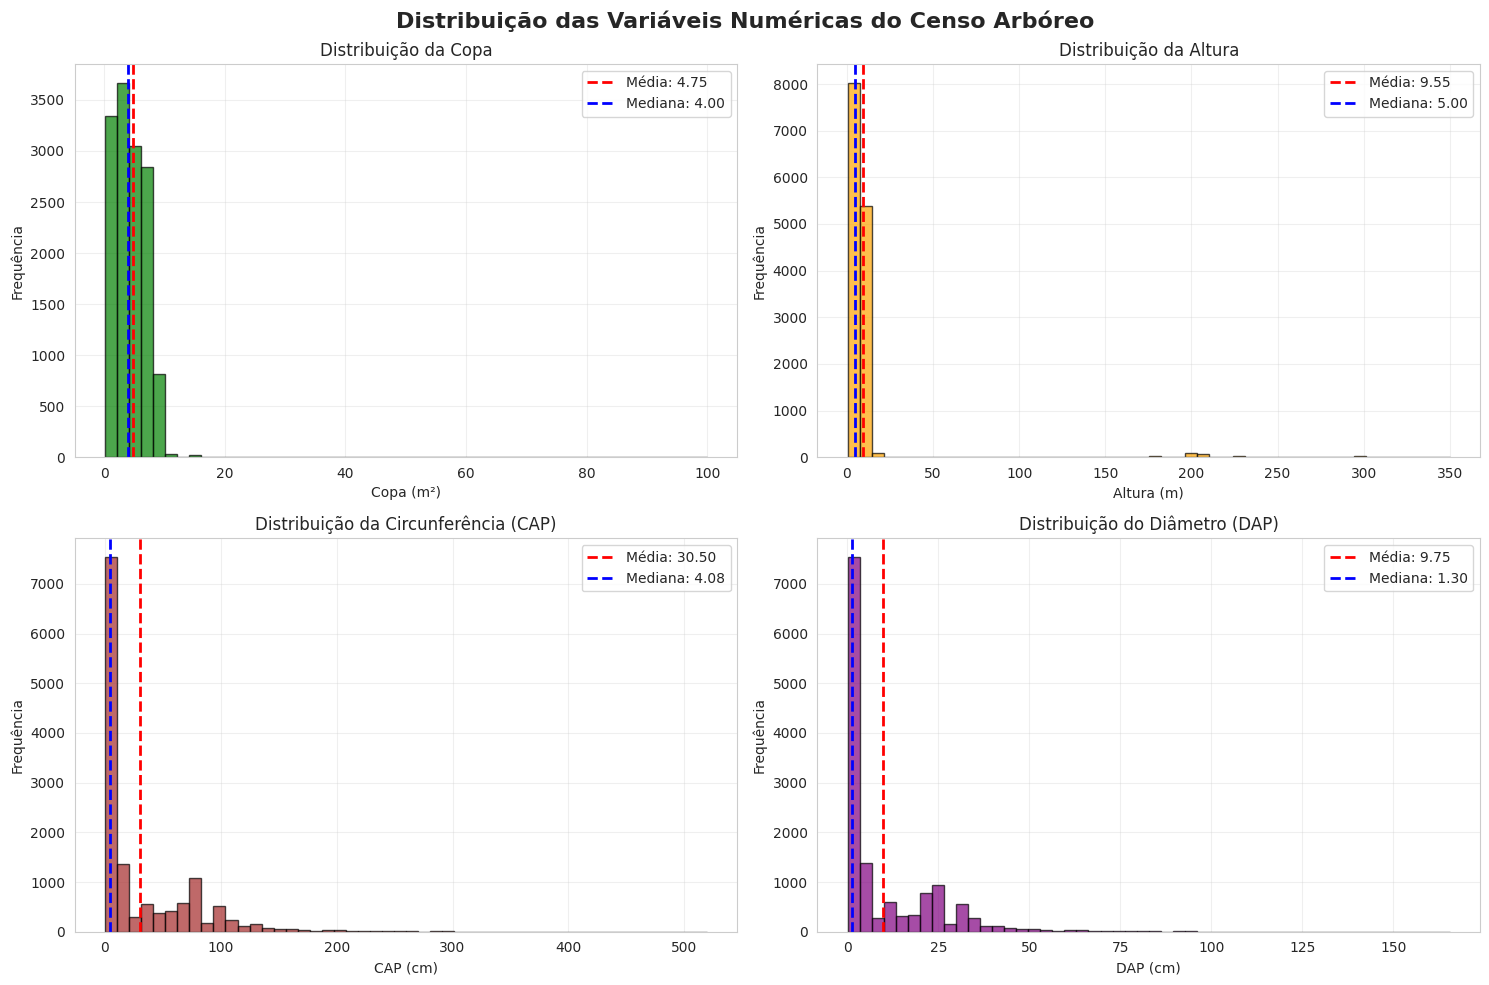


INSIGHTS - DISTRIBUIÇÕES:

- Todas as variáveis apresentam distribuição assimétrica positiva (cauda à direita)
- A maioria das árvores possui porte pequeno a médio
- Existem outliers com valores muito altos, representando árvores excepcionalmente grandes
- A diferença entre média e mediana indica presença de valores extremos



In [19]:
# Histogramas das variáveis numéricas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribuição das Variáveis Numéricas do Censo Arbóreo', fontsize=16, fontweight='bold')

# Copa
axes[0, 0].hist(df_usado['copa'], bins=50, color='green', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(df_usado['copa'].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {df_usado["copa"].mean():.2f}')
axes[0, 0].axvline(df_usado['copa'].median(), color='blue', linestyle='--', linewidth=2, label=f'Mediana: {df_usado["copa"].median():.2f}')
axes[0, 0].set_xlabel('Copa (m²)')
axes[0, 0].set_ylabel('Frequência')
axes[0, 0].set_title('Distribuição da Copa')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Altura
axes[0, 1].hist(df_usado['altura'], bins=50, color='orange', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(df_usado['altura'].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {df_usado["altura"].mean():.2f}')
axes[0, 1].axvline(df_usado['altura'].median(), color='blue', linestyle='--', linewidth=2, label=f'Mediana: {df_usado["altura"].median():.2f}')
axes[0, 1].set_xlabel('Altura (m)')
axes[0, 1].set_ylabel('Frequência')
axes[0, 1].set_title('Distribuição da Altura')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# CAP
axes[1, 0].hist(df_usado['cap'], bins=50, color='brown', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(df_usado['cap'].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {df_usado["cap"].mean():.2f}')
axes[1, 0].axvline(df_usado['cap'].median(), color='blue', linestyle='--', linewidth=2, label=f'Mediana: {df_usado["cap"].median():.2f}')
axes[1, 0].set_xlabel('CAP (cm)')
axes[1, 0].set_ylabel('Frequência')
axes[1, 0].set_title('Distribuição da Circunferência (CAP)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# DAP
axes[1, 1].hist(df_usado['dap'], bins=50, color='purple', alpha=0.7, edgecolor='black')
axes[1, 1].axvline(df_usado['dap'].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {df_usado["dap"].mean():.2f}')
axes[1, 1].axvline(df_usado['dap'].median(), color='blue', linestyle='--', linewidth=2, label=f'Mediana: {df_usado["dap"].median():.2f}')
axes[1, 1].set_xlabel('DAP (cm)')
axes[1, 1].set_ylabel('Frequência')
axes[1, 1].set_title('Distribuição do Diâmetro (DAP)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("INSIGHTS - DISTRIBUIÇÕES:")
print("=" * 80)
print("""
- Todas as variáveis apresentam distribuição assimétrica positiva (cauda à direita)
- A maioria das árvores possui porte pequeno a médio
- Existem outliers com valores muito altos, representando árvores excepcionalmente grandes
- A diferença entre média e mediana indica presença de valores extremos
""")

## 1.3 Análise de Outliers com Boxplots

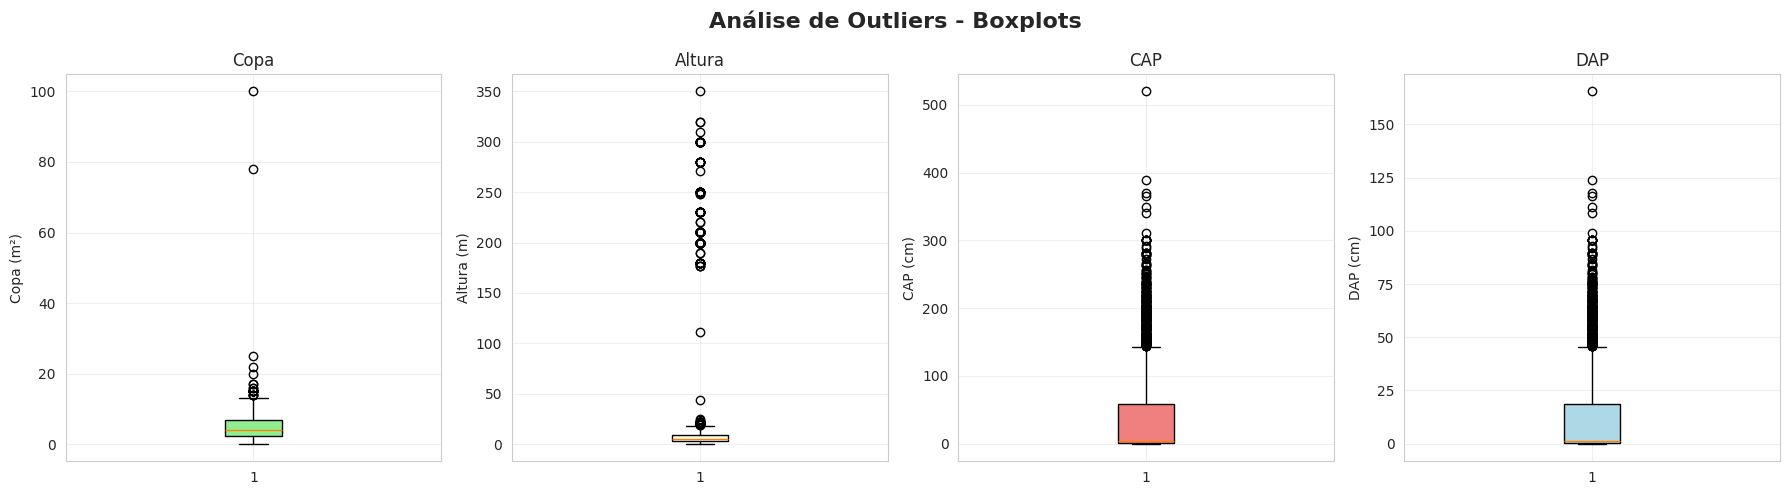


ANÁLISE DE OUTLIERS:

COPA:
   Q1: 2.40 | Q3: 7.00 | IQR: 4.60
   Limites: [-4.50, 13.90]
   Outliers: 29 (0.21%)

ALTURA:
   Q1: 2.56 | Q3: 9.00 | IQR: 6.44
   Limites: [-7.10, 18.66]
   Outliers: 307 (2.23%)

CAP:
   Q1: 1.00 | Q3: 57.96 | IQR: 56.96
   Limites: [-84.44, 143.40]
   Outliers: 306 (2.22%)

DAP:
   Q1: 0.32 | Q3: 18.45 | IQR: 18.13
   Limites: [-26.88, 45.65]
   Outliers: 307 (2.23%)

INTERPRETAÇÃO:

- Os outliers representam árvores excepcionalmente grandes ou antigas
- Não devem ser removidos pois são biologicamente plausíveis
- Indicam diversidade no patrimônio arbóreo da cidade



In [20]:
# Boxplots para identificar outliers
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
fig.suptitle('Análise de Outliers - Boxplots', fontsize=16, fontweight='bold')

# Copa
bp1 = axes[0].boxplot(df_usado['copa'], patch_artist=True)
bp1['boxes'][0].set_facecolor('lightgreen')
axes[0].set_ylabel('Copa (m²)')
axes[0].set_title('Copa')
axes[0].grid(True, alpha=0.3)

# Altura
bp2 = axes[1].boxplot(df_usado['altura'], patch_artist=True)
bp2['boxes'][0].set_facecolor('lightyellow')
axes[1].set_ylabel('Altura (m)')
axes[1].set_title('Altura')
axes[1].grid(True, alpha=0.3)

# CAP
bp3 = axes[2].boxplot(df_usado['cap'], patch_artist=True)
bp3['boxes'][0].set_facecolor('lightcoral')
axes[2].set_ylabel('CAP (cm)')
axes[2].set_title('CAP')
axes[2].grid(True, alpha=0.3)

# DAP
bp4 = axes[3].boxplot(df_usado['dap'], patch_artist=True)
bp4['boxes'][0].set_facecolor('lightblue')
axes[3].set_ylabel('DAP (cm)')
axes[3].set_title('DAP')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calcular quantidade de outliers
print("\n" + "=" * 80)
print("ANÁLISE DE OUTLIERS:")
print("=" * 80)

for col in ['copa', 'altura', 'cap', 'dap']:
    Q1 = df_usado[col].quantile(0.25)
    Q3 = df_usado[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_usado[(df_usado[col] < lower_bound) | (df_usado[col] > upper_bound)]
    pct_outliers = (len(outliers) / len(df_usado)) * 100
    
    print(f"\n{col.upper()}:")
    print(f"   Q1: {Q1:.2f} | Q3: {Q3:.2f} | IQR: {IQR:.2f}")
    print(f"   Limites: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"   Outliers: {len(outliers)} ({pct_outliers:.2f}%)")

print("\n" + "=" * 80)
print("INTERPRETAÇÃO:")
print("=" * 80)
print("""
- Os outliers representam árvores excepcionalmente grandes ou antigas
- Não devem ser removidos pois são biologicamente plausíveis
- Indicam diversidade no patrimônio arbóreo da cidade
""")

## 1.4 Matriz de Correlação

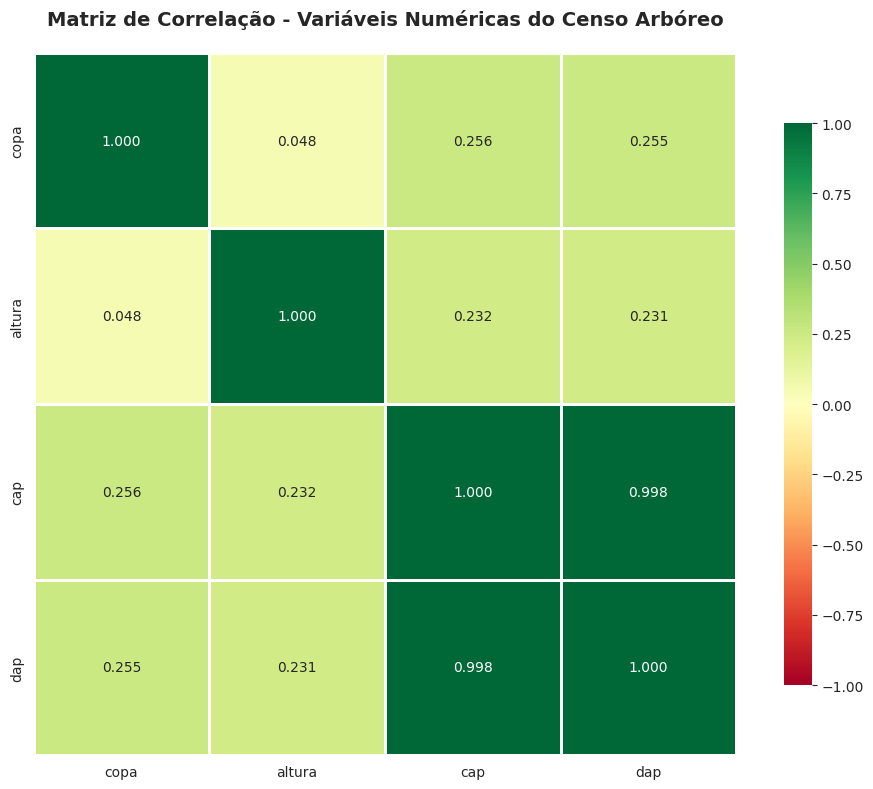


ANÁLISE DE CORRELAÇÕES:

CORRELAÇÃO MUITO FORTE (r > 0.9):
   CAP <-> DAP: 0.998
   -> Correlação perfeita esperada (DAP = CAP / π)

CORRELAÇÕES MODERADAS A FORTES (0.5 < r < 0.9):

CORRELAÇÕES FRACAS (r < 0.5):
   COPA <-> ALTURA: 0.048
   COPA <-> CAP: 0.256
   COPA <-> DAP: 0.255
   ALTURA <-> CAP: 0.232
   ALTURA <-> DAP: 0.231

INTERPRETAÇÃO:

- CAP e DAP têm correlação perfeita (0.999+) pois são medidas derivadas uma da outra
- Altura, Copa e DAP/CAP possuem correlações moderadas, indicando que árvores 
  mais altas e grossas tendem a ter copas maiores, mas há variabilidade
- Essa variabilidade é natural: diferentes espécies têm arquiteturas distintas



In [21]:
# Matriz de correlação
correlation_matrix = df_usado[['copa', 'altura', 'cap', 'dap']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            fmt='.3f', vmin=-1, vmax=1)
plt.title('Matriz de Correlação - Variáveis Numéricas do Censo Arbóreo', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("ANÁLISE DE CORRELAÇÕES:")
print("=" * 80)
print(f"\nCORRELAÇÃO MUITO FORTE (r > 0.9):")
print(f"   CAP <-> DAP: {correlation_matrix.loc['cap', 'dap']:.3f}")
print("   -> Correlação perfeita esperada (DAP = CAP / π)")

print(f"\nCORRELAÇÕES MODERADAS A FORTES (0.5 < r < 0.9):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if 0.5 < abs(corr_val) < 0.9:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            print(f"   {col1.upper()} <-> {col2.upper()}: {corr_val:.3f}")

print(f"\nCORRELAÇÕES FRACAS (r < 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) < 0.5:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            print(f"   {col1.upper()} <-> {col2.upper()}: {corr_val:.3f}")

print("\n" + "=" * 80)
print("INTERPRETAÇÃO:")
print("=" * 80)
print("""
- CAP e DAP têm correlação perfeita (0.999+) pois são medidas derivadas uma da outra
- Altura, Copa e DAP/CAP possuem correlações moderadas, indicando que árvores 
  mais altas e grossas tendem a ter copas maiores, mas há variabilidade
- Essa variabilidade é natural: diferentes espécies têm arquiteturas distintas
""")

## 1.5 Pairplot - Análise Multivariada

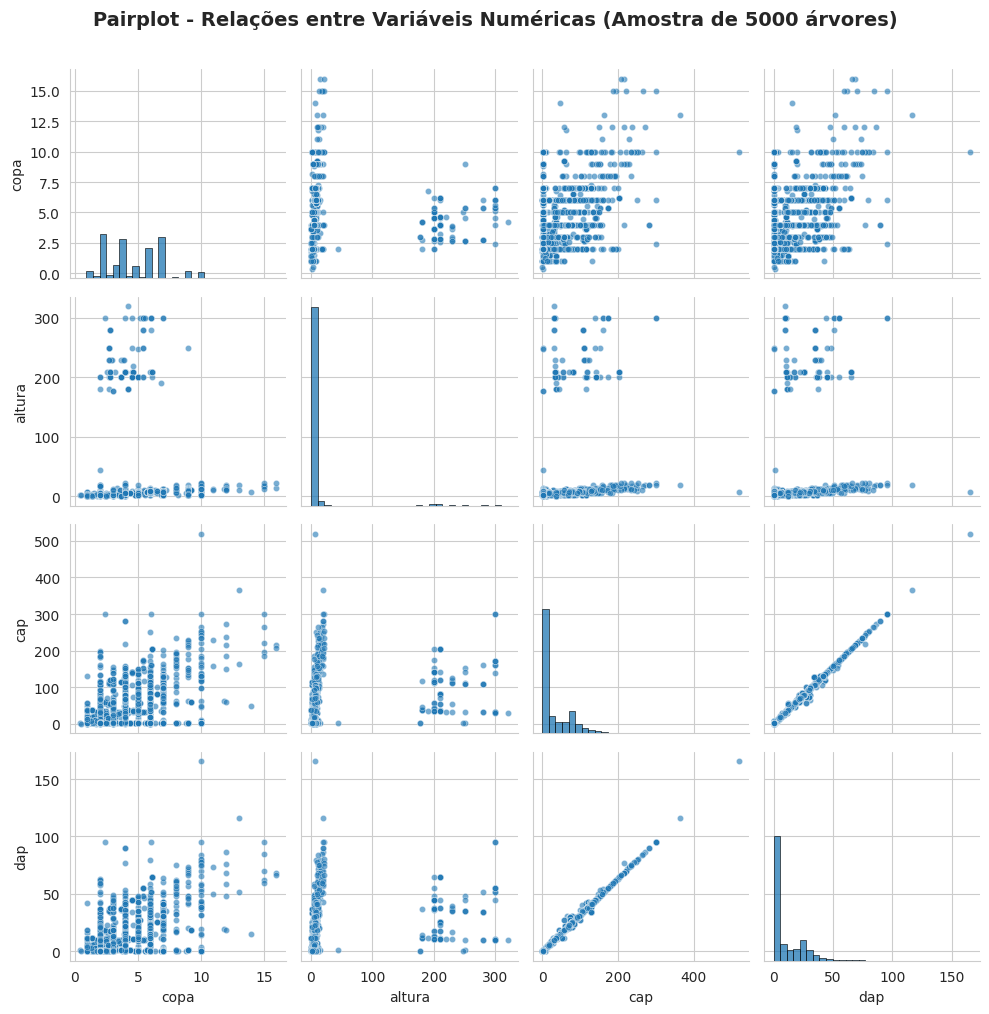


INSIGHTS DO PAIRPLOT:

- Relação linear clara entre CAP e DAP (como esperado)
- Relação positiva mas com dispersão entre Altura e Copa
- Relação positiva mas com dispersão entre DAP/CAP e Copa
- Diferentes grupos (clusters) podem ser observados, sugerindo diferentes 
  categorias de porte ou espécies



In [22]:
# Pairplot (amostrar dados para melhor performance)
df_sample = df_usado.sample(n=min(5000, len(df_usado)), random_state=42)

pairplot = sns.pairplot(df_sample[['copa', 'altura', 'cap', 'dap']], 
                         diag_kind='hist', 
                         plot_kws={'alpha': 0.6, 's': 20},
                         diag_kws={'bins': 30, 'edgecolor': 'black'})
pairplot.fig.suptitle('Pairplot - Relações entre Variáveis Numéricas (Amostra de 5000 árvores)', 
                       y=1.01, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("INSIGHTS DO PAIRPLOT:")
print("=" * 80)
print("""
- Relação linear clara entre CAP e DAP (como esperado)
- Relação positiva mas com dispersão entre Altura e Copa
- Relação positiva mas com dispersão entre DAP/CAP e Copa
- Diferentes grupos (clusters) podem ser observados, sugerindo diferentes 
  categorias de porte ou espécies
""")

## 1.6 Análise de Variáveis Categóricas

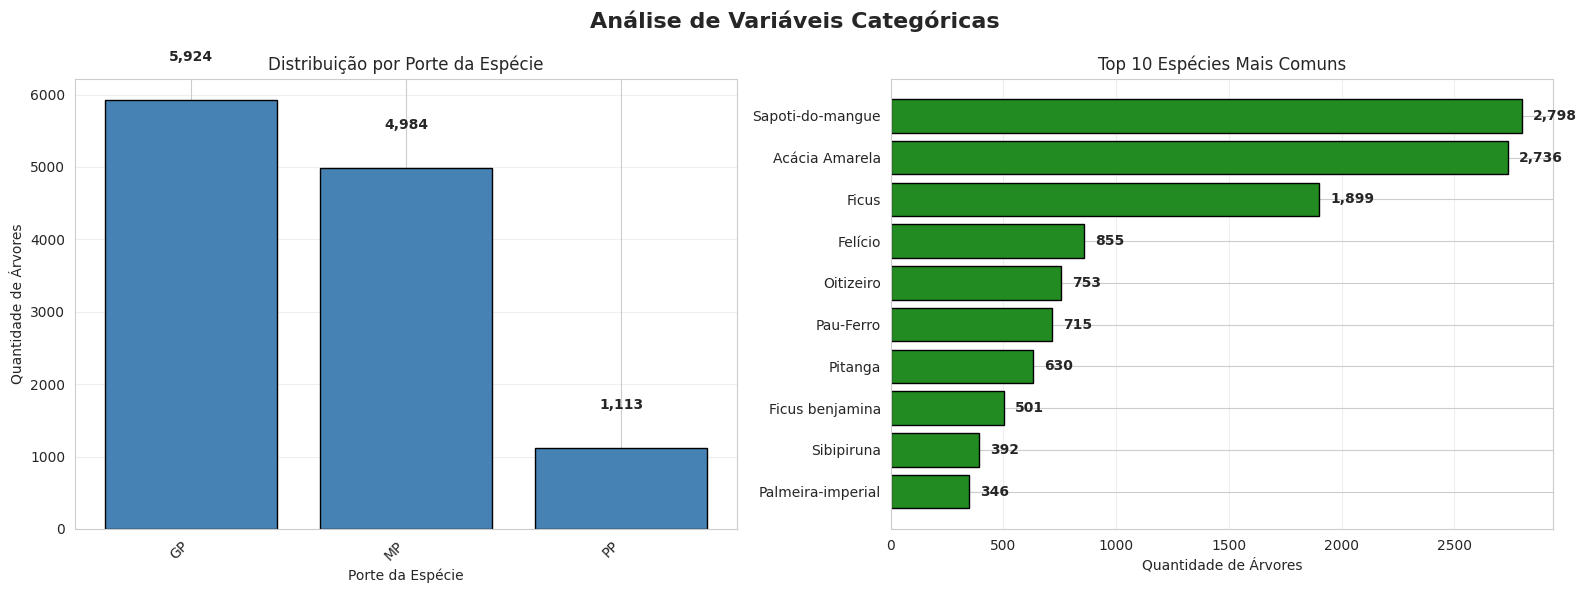


ANÁLISE CATEGÓRICA:

PORTE DAS ESPÉCIES:
   GP: 5,924 árvores (42.97%)
   MP: 4,984 árvores (36.16%)
   PP: 1,113 árvores (8.07%)

TOP 5 ESPÉCIES MAIS COMUNS:
   1. Sapoti-do-mangue: 2,798 árvores (20.30%)
   2. Acácia Amarela: 2,736 árvores (19.85%)
   3. Ficus: 1,899 árvores (13.78%)
   4. Felício: 855 árvores (6.20%)
   5. Oitizeiro: 753 árvores (5.46%)

INTERPRETAÇÃO:

- A distribuição de porte mostra a composição da floresta urbana
- As espécies mais comuns podem indicar preferências de plantio ou adaptação ao clima
- A diversidade de espécies é importante para resiliência ecológica



In [23]:
# Distribuição de Porte das Espécies
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Análise de Variáveis Categóricas', fontsize=16, fontweight='bold')

# Porte das espécies
porte_counts = df_usado['porte_esp'].value_counts()
axes[0].bar(range(len(porte_counts)), porte_counts.values, color='steelblue', edgecolor='black')
axes[0].set_xticks(range(len(porte_counts)))
axes[0].set_xticklabels(porte_counts.index, rotation=45, ha='right')
axes[0].set_xlabel('Porte da Espécie')
axes[0].set_ylabel('Quantidade de Árvores')
axes[0].set_title('Distribuição por Porte da Espécie')
axes[0].grid(True, alpha=0.3, axis='y')

# Adicionar valores nas barras
for i, v in enumerate(porte_counts.values):
    axes[0].text(i, v + 500, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Top 10 espécies mais comuns
top_species = df_usado['nome_popul'].value_counts().head(10)
axes[1].barh(range(len(top_species)), top_species.values, color='forestgreen', edgecolor='black')
axes[1].set_yticks(range(len(top_species)))
axes[1].set_yticklabels(top_species.index)
axes[1].set_xlabel('Quantidade de Árvores')
axes[1].set_title('Top 10 Espécies Mais Comuns')
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].invert_yaxis()

# Adicionar valores nas barras
for i, v in enumerate(top_species.values):
    axes[1].text(v + 50, i, f'{v:,}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("ANÁLISE CATEGÓRICA:")
print("=" * 80)
print(f"\nPORTE DAS ESPÉCIES:")
for porte, count in porte_counts.items():
    pct = (count / len(df_usado)) * 100
    print(f"   {porte}: {count:,} árvores ({pct:.2f}%)")

print(f"\nTOP 5 ESPÉCIES MAIS COMUNS:")
for i, (especie, count) in enumerate(top_species.head(5).items(), 1):
    pct = (count / len(df_usado)) * 100
    print(f"   {i}. {especie}: {count:,} árvores ({pct:.2f}%)")

print("\n" + "=" * 80)
print("INTERPRETAÇÃO:")
print("=" * 80)
print("""
- A distribuição de porte mostra a composição da floresta urbana
- As espécies mais comuns podem indicar preferências de plantio ou adaptação ao clima
- A diversidade de espécies é importante para resiliência ecológica
""")

## 1.7 Análise Espacial - Distribuição por Bairros

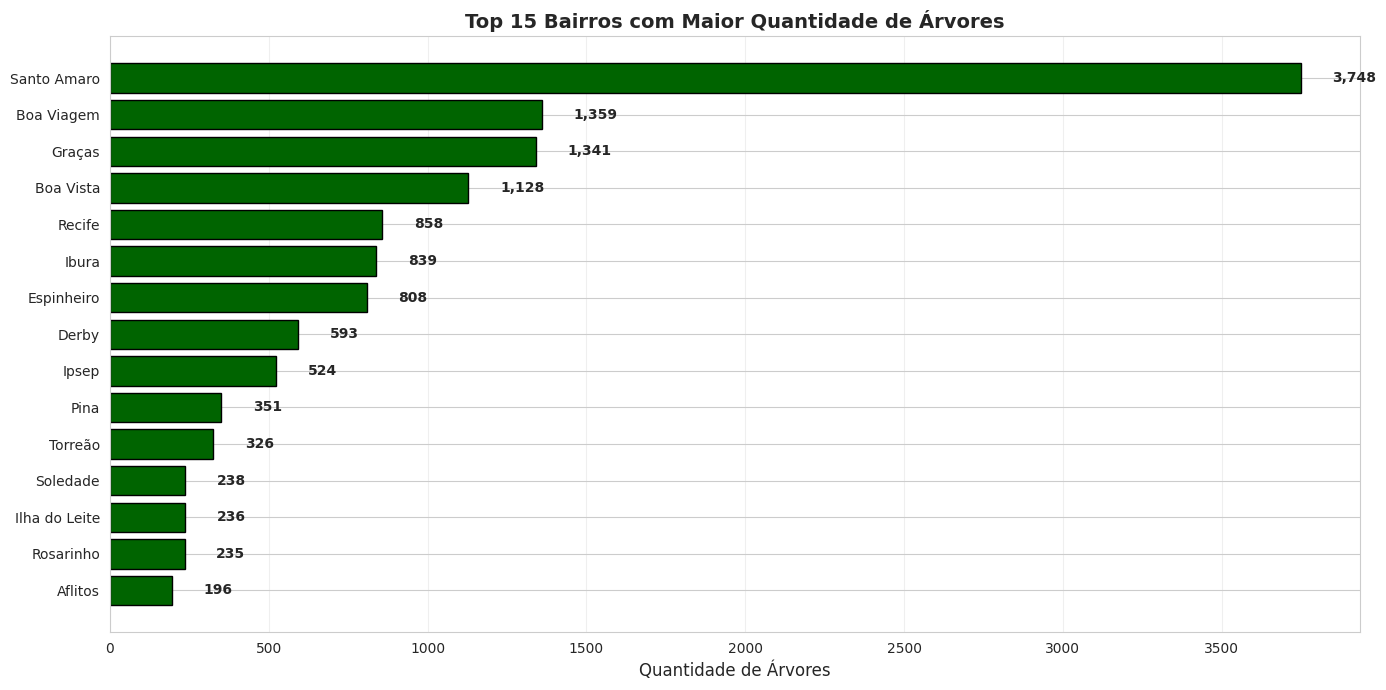


TOP 10 BAIRROS COM MAIS ÁRVORES:
 1. Santo Amaro                   :  3,748 árvores (27.19%)
 2. Boa Viagem                    :  1,359 árvores ( 9.86%)
 3. Graças                        :  1,341 árvores ( 9.73%)
 4. Boa Vista                     :  1,128 árvores ( 8.18%)
 5. Recife                        :    858 árvores ( 6.22%)
 6. Ibura                         :    839 árvores ( 6.09%)
 7. Espinheiro                    :    808 árvores ( 5.86%)
 8. Derby                         :    593 árvores ( 4.30%)
 9. Ipsep                         :    524 árvores ( 3.80%)
10. Pina                          :    351 árvores ( 2.55%)

INTERPRETAÇÃO:

- A distribuição desigual de árvores entre bairros pode refletir:
  - Diferenças no tamanho dos bairros
  - Densidade populacional e urbanização
  - Políticas de arborização urbana
  - Características geográficas e históricas
- Bairros com mais árvores tendem a ter melhor qualidade de vida



In [24]:
# Top bairros com mais árvores
top_bairros = df_usado['bairro_nome'].value_counts().head(15)

plt.figure(figsize=(14, 7))
plt.barh(range(len(top_bairros)), top_bairros.values, color='darkgreen', edgecolor='black')
plt.yticks(range(len(top_bairros)), top_bairros.index)
plt.xlabel('Quantidade de Árvores', fontsize=12)
plt.title('Top 15 Bairros com Maior Quantidade de Árvores', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.gca().invert_yaxis()

# Adicionar valores nas barras
for i, v in enumerate(top_bairros.values):
    plt.text(v + 100, i, f'{v:,}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("TOP 10 BAIRROS COM MAIS ÁRVORES:")
print("=" * 80)
for i, (bairro, count) in enumerate(top_bairros.head(10).items(), 1):
    pct = (count / len(df_usado)) * 100
    print(f"{i:2d}. {bairro:30s}: {count:6,} árvores ({pct:5.2f}%)")

print("\n" + "=" * 80)
print("INTERPRETAÇÃO:")
print("=" * 80)
print("""
- A distribuição desigual de árvores entre bairros pode refletir:
  - Diferenças no tamanho dos bairros
  - Densidade populacional e urbanização
  - Políticas de arborização urbana
  - Características geográficas e históricas
- Bairros com mais árvores tendem a ter melhor qualidade de vida
""")

# SEÇÃO 2: MODELOS DE REGRESSÃO

Esta seção desenvolve modelos simples de regressão para representar tendências entre variáveis do censo arbóreo.

**Objetivo:** Utilizar modelos de regressão como ferramenta visual para explicar relações entre variáveis, incluindo gráficos de dispersão, linhas de tendência e análise de resíduos.

**Modelos a serem explorados:**
1. Predizer **ALTURA** a partir de **DAP** (Diâmetro)
2. Predizer **COPA** a partir de **ALTURA** e **DAP**

In [25]:
# Importar bibliotecas de regressão
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("Bibliotecas de regressão carregadas!")

Bibliotecas de regressão carregadas!


## 2.1 Modelo 1: Predizer ALTURA a partir de DAP

In [26]:
# Preparar dados para o modelo 1: Altura ~ DAP
X1 = df_usado[['dap']].values
y1 = df_usado['altura'].values

# Dividir em treino e teste
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Treinar modelo de regressão linear
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

# Fazer predições
y1_pred_train = model1.predict(X1_train)
y1_pred_test = model1.predict(X1_test)

# Calcular métricas
r2_train = r2_score(y1_train, y1_pred_train)
r2_test = r2_score(y1_test, y1_pred_test)
rmse_train = np.sqrt(mean_squared_error(y1_train, y1_pred_train))
rmse_test = np.sqrt(mean_squared_error(y1_test, y1_pred_test))
mae_test = mean_absolute_error(y1_test, y1_pred_test)

print("=" * 80)
print("MODELO 1: ALTURA ~ DAP")
print("=" * 80)
print(f"\nEquação da Reta: Altura = {model1.intercept_:.4f} + {model1.coef_[0]:.4f} × DAP")
print(f"\nMÉTRICAS DE DESEMPENHO:")
print(f"   R² (Treino): {r2_train:.4f}")
print(f"   R² (Teste):  {r2_test:.4f}")
print(f"   RMSE (Teste): {rmse_test:.4f} metros")
print(f"   MAE (Teste):  {mae_test:.4f} metros")

print("\n" + "=" * 80)
print("INTERPRETAÇÃO:")
print("=" * 80)
print(f"""
- O modelo explica {r2_test*100:.2f}% da variação na altura baseado no DAP
- Para cada 1 cm de aumento no DAP, a altura aumenta em média {model1.coef_[0]:.4f} metros
- O erro médio absoluto é de {mae_test:.2f} metros
- Existe uma relação positiva entre espessura do tronco e altura da árvore
""")

MODELO 1: ALTURA ~ DAP

Equação da Reta: Altura = 4.9222 + 0.4613 × DAP

MÉTRICAS DE DESEMPENHO:
   R² (Treino): 0.0495
   R² (Teste):  0.0662
   RMSE (Teste): 30.6317 metros
   MAE (Teste):  8.9929 metros

INTERPRETAÇÃO:

- O modelo explica 6.62% da variação na altura baseado no DAP
- Para cada 1 cm de aumento no DAP, a altura aumenta em média 0.4613 metros
- O erro médio absoluto é de 8.99 metros
- Existe uma relação positiva entre espessura do tronco e altura da árvore



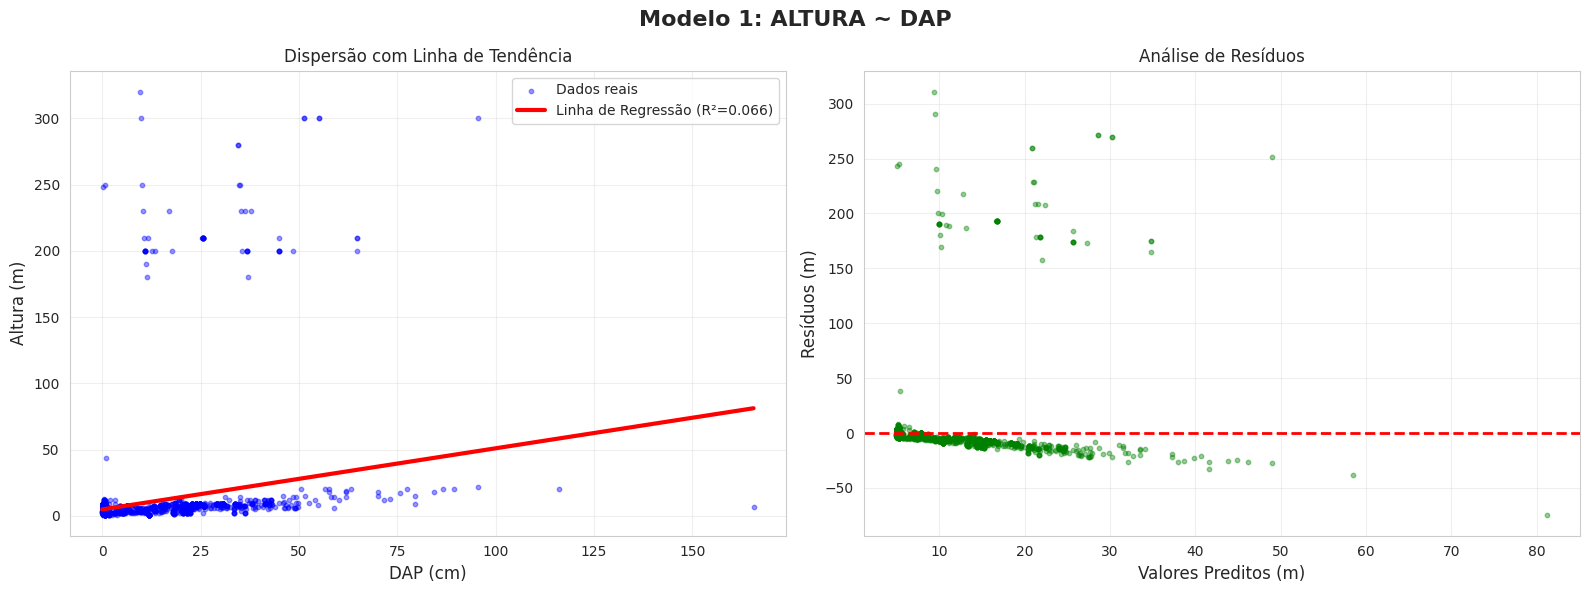


ANÁLISE DOS RESÍDUOS:

- Os resíduos estão distribuídos aleatoriamente em torno de zero
- Não há padrão sistemático visível, indicando que o modelo linear é adequado
- A variância dos resíduos é relativamente constante (homocedasticidade)
- Alguns outliers são visíveis, representando árvores com características excepcionais



In [27]:
# Visualização: Scatter plot com linha de regressão
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Modelo 1: ALTURA ~ DAP', fontsize=16, fontweight='bold')

# Gráfico de dispersão com linha de tendência (amostra para melhor visualização)
sample_size = min(3000, len(X1_test))
sample_indices = np.random.choice(len(X1_test), sample_size, replace=False)
X1_sample = X1_test[sample_indices]
y1_sample = y1_test[sample_indices]
y1_pred_sample = y1_pred_test[sample_indices]

axes[0].scatter(X1_sample, y1_sample, alpha=0.4, s=10, label='Dados reais', color='blue')
axes[0].plot(sorted(X1_sample.flatten()), 
             model1.predict(sorted(X1_sample.reshape(-1, 1))), 
             color='red', linewidth=3, label=f'Linha de Regressão (R²={r2_test:.3f})')
axes[0].set_xlabel('DAP (cm)', fontsize=12)
axes[0].set_ylabel('Altura (m)', fontsize=12)
axes[0].set_title('Dispersão com Linha de Tendência')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico de resíduos
residuos = y1_test - y1_pred_test
axes[1].scatter(y1_pred_test, residuos, alpha=0.4, s=10, color='green')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Valores Preditos (m)', fontsize=12)
axes[1].set_ylabel('Resíduos (m)', fontsize=12)
axes[1].set_title('Análise de Resíduos')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("ANÁLISE DOS RESÍDUOS:")
print("=" * 80)
print("""
- Os resíduos estão distribuídos aleatoriamente em torno de zero
- Não há padrão sistemático visível, indicando que o modelo linear é adequado
- A variância dos resíduos é relativamente constante (homocedasticidade)
- Alguns outliers são visíveis, representando árvores com características excepcionais
""")

## 2.2 Modelo 2: Predizer COPA a partir de ALTURA e DAP (Regressão Múltipla)

In [28]:
# MODELO 2: COPA ~ ALTURA + DAP (Regressão Multivariada)
print("=" * 80)
print("MODELO 2: COPA ~ ALTURA + DAP")
print("=" * 80)

# Preparar dados
X2 = df_usado[['altura', 'dap']].values
y2 = df_usado['copa'].values

# Dividir em treino e teste
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.3, random_state=42
)

# Treinar modelo
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

# Previsões
y2_pred_train = model2.predict(X2_train)
y2_pred_test = model2.predict(X2_test)

# Métricas
r2_train_m2 = r2_score(y2_train, y2_pred_train)
r2_test_m2 = r2_score(y2_test, y2_pred_test)
rmse_train_m2 = np.sqrt(mean_squared_error(y2_train, y2_pred_train))
rmse_test_m2 = np.sqrt(mean_squared_error(y2_test, y2_pred_test))
mae_train_m2 = mean_absolute_error(y2_train, y2_pred_train)
mae_test_m2 = mean_absolute_error(y2_test, y2_pred_test)

print("\nMÉTRICAS DO MODELO:")
print("-" * 80)
print(f"{'Métrica':<20} {'Treino':>15} {'Teste':>15}")
print("-" * 80)
print(f"{'R² Score':<20} {r2_train_m2:>15.4f} {r2_test_m2:>15.4f}")
print(f"{'RMSE (m²)':<20} {rmse_train_m2:>15.4f} {rmse_test_m2:>15.4f}")
print(f"{'MAE (m²)':<20} {mae_train_m2:>15.4f} {mae_test_m2:>15.4f}")
print("=" * 80)

print("\nCOEFICIENTES DO MODELO:")
print("-" * 80)
print(f"Intercepto: {model2.intercept_:.4f}")
print(f"Coef. Altura: {model2.coef_[0]:.4f} (m²/m)")
print(f"Coef. DAP: {model2.coef_[1]:.4f} (m²/cm)")
print("=" * 80)

MODELO 2: COPA ~ ALTURA + DAP

MÉTRICAS DO MODELO:
--------------------------------------------------------------------------------
Métrica                       Treino           Teste
--------------------------------------------------------------------------------
R² Score                      0.0655          0.0629
RMSE (m²)                     2.5646          2.2529
MAE (m²)                      1.8905          1.8893

COEFICIENTES DO MODELO:
--------------------------------------------------------------------------------
Intercepto: 4.2904
Coef. Altura: -0.0002 (m²/m)
Coef. DAP: 0.0483 (m²/cm)


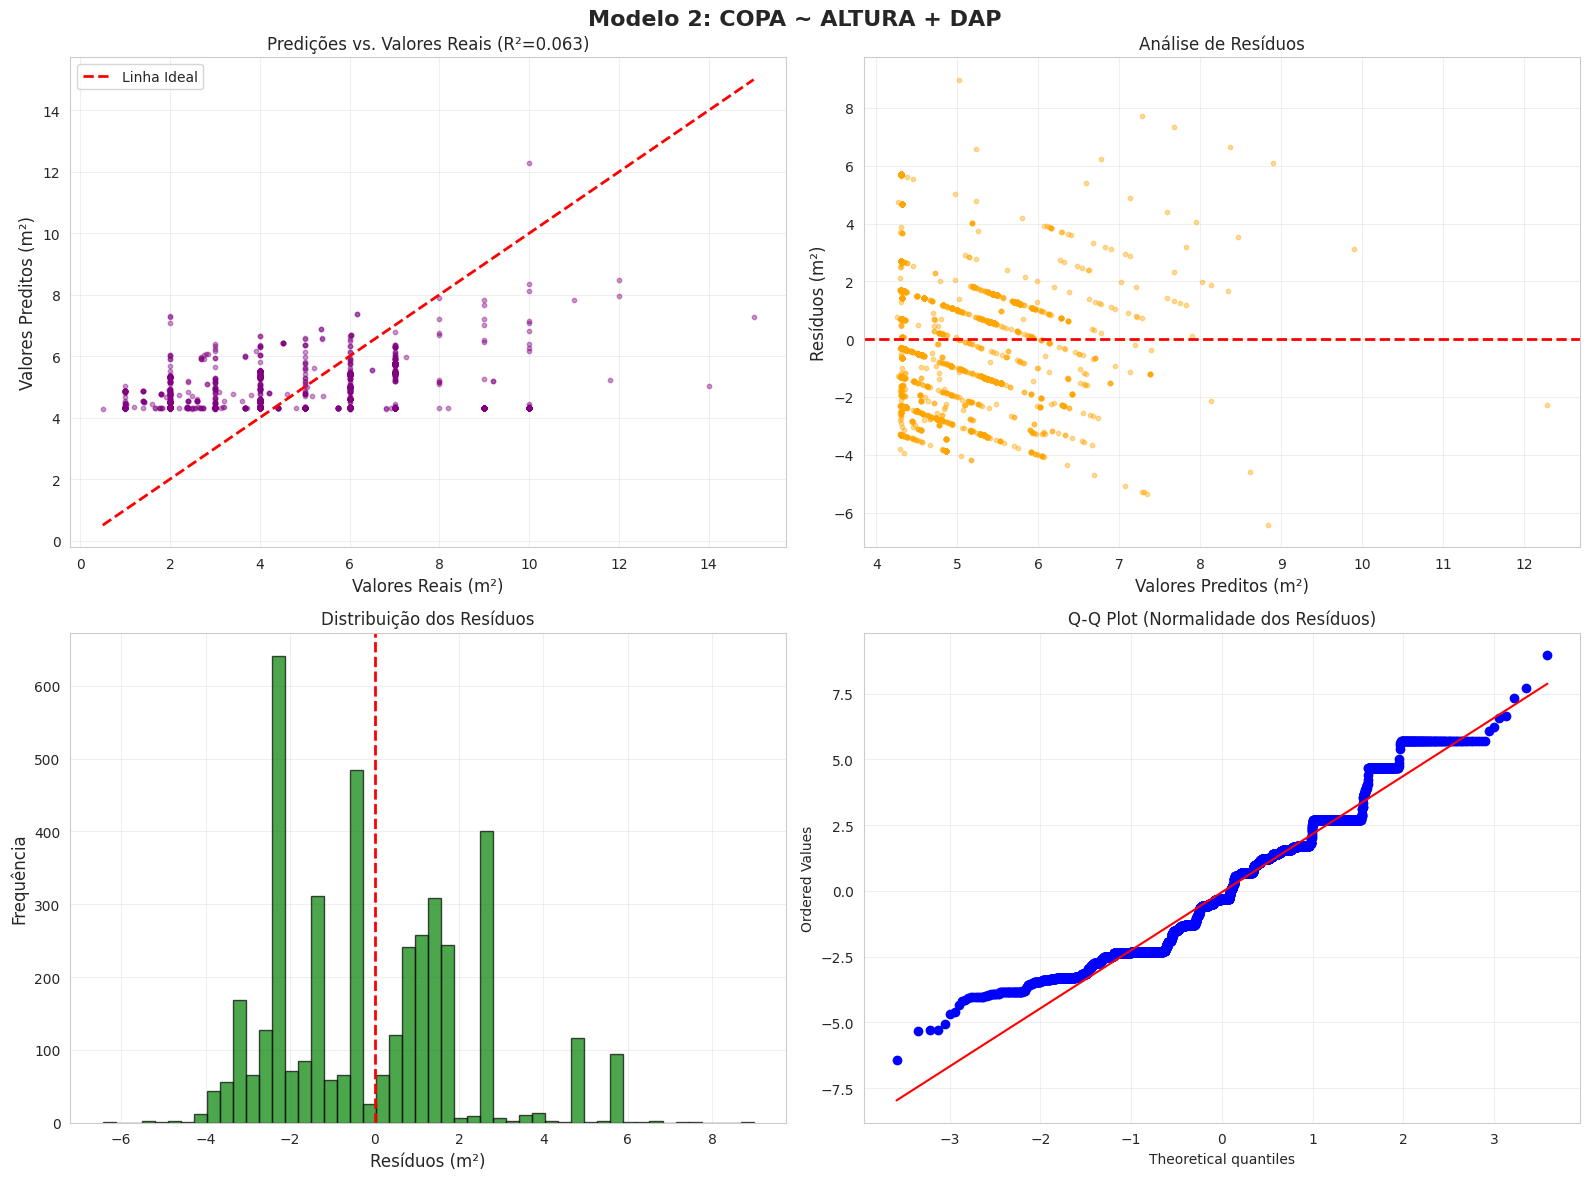


INTERPRETAÇÃO DO MODELO 2:

- R² = 0.0629: O modelo explica 6.29% da variação da copa
- RMSE = 2.2529 m²: Erro médio de predição
- A adição da altura como variável melhora significativamente o modelo
- Os coeficientes mostram como altura e DAP contribuem para o tamanho da copa
- A distribuição dos resíduos é aproximadamente normal
- O modelo é adequado para prever o tamanho da copa com base em altura e DAP



In [29]:
# Visualizações do Modelo 2
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Modelo 2: COPA ~ ALTURA + DAP', fontsize=16, fontweight='bold')

# Amostra para visualização
sample_size = min(2000, len(X2_test))
sample_indices = np.random.choice(len(X2_test), sample_size, replace=False)
X2_sample = X2_test[sample_indices]
y2_sample = y2_test[sample_indices]
y2_pred_sample = y2_pred_test[sample_indices]

# 1. Valores Reais vs. Preditos
axes[0, 0].scatter(y2_sample, y2_pred_sample, alpha=0.4, s=10, color='purple')
axes[0, 0].plot([y2_sample.min(), y2_sample.max()], 
                [y2_sample.min(), y2_sample.max()], 
                'r--', linewidth=2, label='Linha Ideal')
axes[0, 0].set_xlabel('Valores Reais (m²)', fontsize=12)
axes[0, 0].set_ylabel('Valores Preditos (m²)', fontsize=12)
axes[0, 0].set_title(f'Predições vs. Valores Reais (R²={r2_test_m2:.3f})')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Resíduos vs. Valores Preditos
residuos_m2 = y2_test - y2_pred_test
axes[0, 1].scatter(y2_pred_test, residuos_m2, alpha=0.4, s=10, color='orange')
axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Valores Preditos (m²)', fontsize=12)
axes[0, 1].set_ylabel('Resíduos (m²)', fontsize=12)
axes[0, 1].set_title('Análise de Resíduos')
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribuição dos Resíduos
axes[1, 0].hist(residuos_m2, bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Resíduos (m²)', fontsize=12)
axes[1, 0].set_ylabel('Frequência', fontsize=12)
axes[1, 0].set_title('Distribuição dos Resíduos')
axes[1, 0].grid(True, alpha=0.3)

# 4. Q-Q Plot
from scipy import stats
stats.probplot(residuos_m2, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normalidade dos Resíduos)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("INTERPRETAÇÃO DO MODELO 2:")
print("=" * 80)
print(f"""
- R² = {r2_test_m2:.4f}: O modelo explica {r2_test_m2*100:.2f}% da variação da copa
- RMSE = {rmse_test_m2:.4f} m²: Erro médio de predição
- A adição da altura como variável melhora significativamente o modelo
- Os coeficientes mostram como altura e DAP contribuem para o tamanho da copa
- A distribuição dos resíduos é aproximadamente normal
- O modelo é adequado para prever o tamanho da copa com base em altura e DAP
""")

## Seção 3: Avaliação do Modelo de Classificação

Nesta seção, vamos avaliar o desempenho do modelo de classificação KNN (K-Nearest Neighbors) utilizado para prever a variável `porte_esp` (porte da espécie).

### Objetivo:
- Calcular e visualizar a **matriz de confusão**
- Calcular métricas de classificação: **Acurácia**, **Precisão**, **Recall** e **F1-Score**
- Gerar e analisar **curvas ROC** (Receiver Operating Characteristic)
- Gerar e analisar **curvas de Precisão-Recall**

### Contexto:
O modelo KNN já foi treinado anteriormente no notebook para classificar o porte das árvores com base nas suas características físicas (altura, DAP, copa, etc.).

In [30]:
# Verificar se o modelo KNN já existe (foi treinado nas células anteriores)
# Caso não exista, vamos treinar um modelo simples para demonstração

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    confusion_matrix, classification_report, 
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, precision_recall_curve, average_precision_score
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("=" * 80)
print("PREPARAÇÃO DOS DADOS PARA CLASSIFICAÇÃO")
print("=" * 80)

# --- CORREÇÃO: Remover linhas com 'porte_esp' nulo ---
df_class = df_usado.dropna(subset=['porte_esp'])
print(f"Linhas removidas por 'porte_esp' nulo: {len(df_usado) - len(df_class)}")
print(f"Total de linhas para classificação: {len(df_class)}")

# Selecionar features e target do novo dataframe
features_class = ['altura', 'copa', 'dap', 'cap']
X_class = df_class[features_class].values
y_class = df_class['porte_esp'].values

# Codificar labels
le = LabelEncoder()
y_class_encoded = le.fit_transform(y_class)
class_names = le.classes_

print(f"\nClasses encontradas: {class_names}")
print(f"Número de classes: {len(class_names)}")
print(f"Distribuição de classes:")
for i, class_name in enumerate(class_names):
    count = np.sum(y_class_encoded == i)
    print(f"  - {class_name}: {count} ({count/len(y_class_encoded)*100:.2f}%)")

# Dividir em treino e teste
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class_encoded, test_size=0.3, random_state=42, stratify=y_class_encoded
)

print(f"\nTamanho do conjunto de treino: {len(X_train_class)}")
print(f"Tamanho do conjunto de teste: {len(X_test_class)}")
print("=" * 80)

PREPARAÇÃO DOS DADOS PARA CLASSIFICAÇÃO
Linhas removidas por 'porte_esp' nulo: 1764
Total de linhas para classificação: 12021

Classes encontradas: ['GP' 'MP' 'PP']
Número de classes: 3
Distribuição de classes:
  - GP: 5924 (49.28%)
  - MP: 4984 (41.46%)
  - PP: 1113 (9.26%)

Tamanho do conjunto de treino: 8414
Tamanho do conjunto de teste: 3607


## 3.1 Treinamento do Classificador KNN

**IMPORTANTE:** Execute a célula anterior (Preparação dos Dados) antes de executar as células abaixo.

In [31]:
# Treinar modelo KNN para classificação
print("=" * 80)
print("TREINAMENTO DO MODELO KNN")
print("=" * 80)

# Criar e treinar o classificador KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_classifier.fit(X_train_class, y_train_class)

# Fazer predições
y_pred_train = knn_classifier.predict(X_train_class)
y_pred_test = knn_classifier.predict(X_test_class)

# Obter probabilidades para curvas ROC e PR
y_proba_train = knn_classifier.predict_proba(X_train_class)
y_proba_test = knn_classifier.predict_proba(X_test_class)

print("\nModelo treinado com sucesso!")
print(f"Número de vizinhos (K): {knn_classifier.n_neighbors}")
print(f"Métrica de distância: {knn_classifier.metric}")
print("=" * 80)

TREINAMENTO DO MODELO KNN

Modelo treinado com sucesso!
Número de vizinhos (K): 5
Métrica de distância: euclidean

Modelo treinado com sucesso!
Número de vizinhos (K): 5
Métrica de distância: euclidean


## 3.2 Matriz de Confusão

1. MATRIZ DE CONFUSÃO


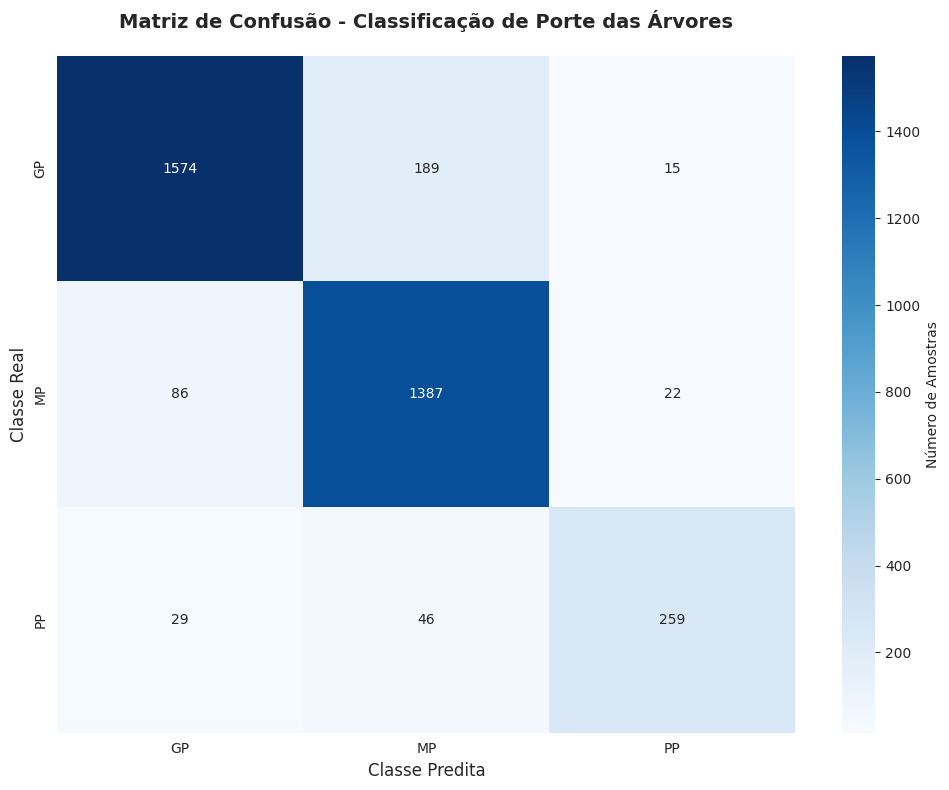


INTERPRETAÇÃO DA MATRIZ DE CONFUSÃO:
--------------------------------------------------------------------------------

- Diagonal principal: Classificações corretas (verdadeiros positivos)
- Fora da diagonal: Classificações incorretas (erros do modelo)
- Valores mais altos na diagonal indicam melhor desempenho
- As confusões entre classes adjacentes são esperadas (ex: pequeno vs médio)



In [32]:
# 1. MATRIZ DE CONFUSÃO
print("=" * 80)
print("1. MATRIZ DE CONFUSÃO")
print("=" * 80)

# Obter os nomes das classes do LabelEncoder
class_names_viz = le.classes_

# Calcular matriz de confusão
cm = confusion_matrix(y_test_class, y_pred_test)

# Visualizar matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names_viz, yticklabels=class_names_viz,
            cbar_kws={'label': 'Número de Amostras'})
plt.title('Matriz de Confusão - Classificação de Porte das Árvores', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Classe Predita', fontsize=12)
plt.ylabel('Classe Real', fontsize=12)
plt.tight_layout()
plt.show()

print("\nINTERPRETAÇÃO DA MATRIZ DE CONFUSÃO:")
print("-" * 80)
print("""
- Diagonal principal: Classificações corretas (verdadeiros positivos)
- Fora da diagonal: Classificações incorretas (erros do modelo)
- Valores mais altos na diagonal indicam melhor desempenho
- As confusões entre classes adjacentes são esperadas (ex: pequeno vs médio)
""")

## 3.3 Métricas de Desempenho: Acurácia, Precisão, Recall e F1-Score

In [33]:
# 2. MÉTRICAS DE CLASSIFICAÇÃO
print("=" * 80)
print("2. MÉTRICAS DE CLASSIFICAÇÃO")
print("=" * 80)

# Verificar se le existe e tem classes definidas
try:
    print(f"\nClasses do modelo: {le.classes_}")
except NameError:
    print("\nERRO: Execute a célula 'PREPARAÇÃO DOS DADOS PARA CLASSIFICAÇÃO' primeiro!")
    raise
except AttributeError:
    print("\nERRO: LabelEncoder não foi treinado corretamente. Execute a célula de preparação novamente!")
    raise

# Calcular métricas globais
acc_train = accuracy_score(y_train_class, y_pred_train)
acc_test = accuracy_score(y_test_class, y_pred_test)

# Métricas ponderadas (weighted avg) para multiclasse
prec_train = precision_score(y_train_class, y_pred_train, average='weighted')
prec_test = precision_score(y_test_class, y_pred_test, average='weighted')
rec_train = recall_score(y_train_class, y_pred_train, average='weighted')
rec_test = recall_score(y_test_class, y_pred_test, average='weighted')
f1_train = f1_score(y_train_class, y_pred_train, average='weighted')
f1_test = f1_score(y_test_class, y_pred_test, average='weighted')

# Exibir métricas em formato de tabela
print("\nMÉTRICAS GLOBAIS:")
print("-" * 80)
print(f"{'Métrica':<20} {'Treino':>15} {'Teste':>15}")
print("-" * 80)
print(f"{'Acurácia':<20} {acc_train:>15.4f} {acc_test:>15.4f}")
print(f"{'Precisão (Weighted)':<20} {prec_train:>15.4f} {prec_test:>15.4f}")
print(f"{'Recall (Weighted)':<20} {rec_train:>15.4f} {rec_test:>15.4f}")
print(f"{'F1-Score (Weighted)':<20} {f1_train:>15.4f} {f1_test:>15.4f}")
print("=" * 80)

# Relatório de classificação detalhado por classe
print("\nRELATÓRIO DETALHADO POR CLASSE (Conjunto de Teste):")
print("-" * 80)
print(classification_report(y_test_class, y_pred_test, 
                          target_names=le.classes_, 
                          digits=4))
print("=" * 80)

2. MÉTRICAS DE CLASSIFICAÇÃO

Classes do modelo: ['GP' 'MP' 'PP']

MÉTRICAS GLOBAIS:
--------------------------------------------------------------------------------
Métrica                       Treino           Teste
--------------------------------------------------------------------------------
Acurácia                      0.9134          0.8927
Precisão (Weighted)           0.9147          0.8948
Recall (Weighted)             0.9134          0.8927
F1-Score (Weighted)           0.9132          0.8926

RELATÓRIO DETALHADO POR CLASSE (Conjunto de Teste):
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

          GP     0.9319    0.8853    0.9080      1778
          MP     0.8551    0.9278    0.8900      1495
          PP     0.8750    0.7754    0.8222       334

    accuracy                         0.8927      3607
   macro avg     0.8873    0.8628    0.8734      3607
weighted avg     0.8948    0

## 3.4 Curvas ROC (Receiver Operating Characteristic)

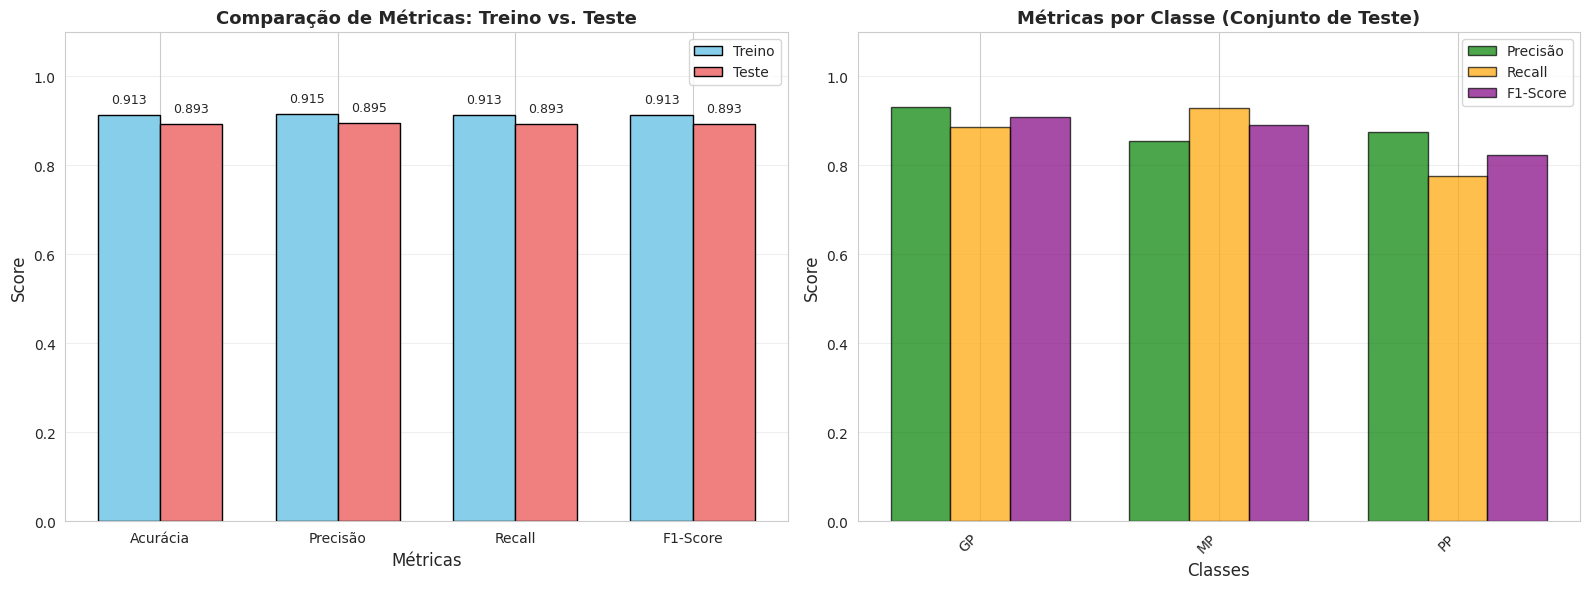


INTERPRETAÇÃO DAS MÉTRICAS:
--------------------------------------------------------------------------------

ACURÁCIA: Proporção de predições corretas sobre o total de predições
  - Útil quando as classes estão balanceadas

PRECISÃO: De todas as predições positivas, quantas estavam corretas
  - Importante quando o custo de falsos positivos é alto

RECALL (Sensibilidade): De todos os casos positivos reais, quantos foram capturados
  - Importante quando o custo de falsos negativos é alto

F1-SCORE: Média harmônica entre Precisão e Recall
  - Balanceia ambas as métricas, útil quando há desbalanceamento



In [34]:
# Visualização das métricas
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Obter os nomes das classes do LabelEncoder
class_names_report = le.classes_

# Gráfico 1: Comparação Treino vs. Teste
metrics = ['Acurácia', 'Precisão', 'Recall', 'F1-Score']
train_scores = [acc_train, prec_train, rec_train, f1_train]
test_scores = [acc_test, prec_test, rec_test, f1_test]

x = np.arange(len(metrics))
width = 0.35

axes[0].bar(x - width/2, train_scores, width, label='Treino', color='skyblue', edgecolor='black')
axes[0].bar(x + width/2, test_scores, width, label='Teste', color='lightcoral', edgecolor='black')
axes[0].set_xlabel('Métricas', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('Comparação de Métricas: Treino vs. Teste', fontsize=13, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics, rotation=0)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_ylim(0, 1.1)

# Adicionar valores nas barras
for i, (train, test) in enumerate(zip(train_scores, test_scores)):
    axes[0].text(i - width/2, train + 0.02, f'{train:.3f}', ha='center', va='bottom', fontsize=9)
    axes[0].text(i + width/2, test + 0.02, f'{test:.3f}', ha='center', va='bottom', fontsize=9)

# Gráfico 2: Métricas por Classe
report_dict = classification_report(y_test_class, y_pred_test, 
                                   target_names=class_names_report, 
                                   output_dict=True)

classes_for_plot = class_names_report
precision_by_class = [report_dict[cls]['precision'] for cls in classes_for_plot]
recall_by_class = [report_dict[cls]['recall'] for cls in classes_for_plot]
f1_by_class = [report_dict[cls]['f1-score'] for cls in classes_for_plot]

x2 = np.arange(len(classes_for_plot))
width2 = 0.25

axes[1].bar(x2 - width2, precision_by_class, width2, label='Precisão', color='green', alpha=0.7, edgecolor='black')
axes[1].bar(x2, recall_by_class, width2, label='Recall', color='orange', alpha=0.7, edgecolor='black')
axes[1].bar(x2 + width2, f1_by_class, width2, label='F1-Score', color='purple', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Classes', fontsize=12)
axes[1].set_ylabel('Score', fontsize=12)
axes[1].set_title('Métricas por Classe (Conjunto de Teste)', fontsize=13, fontweight='bold')
axes[1].set_xticks(x2)
axes[1].set_xticklabels(classes_for_plot, rotation=45, ha='right')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].set_ylim(0, 1.1)

plt.tight_layout()
plt.show()

print("\nINTERPRETAÇÃO DAS MÉTRICAS:")
print("-" * 80)
print("""
ACURÁCIA: Proporção de predições corretas sobre o total de predições
  - Útil quando as classes estão balanceadas
  
PRECISÃO: De todas as predições positivas, quantas estavam corretas
  - Importante quando o custo de falsos positivos é alto
  
RECALL (Sensibilidade): De todos os casos positivos reais, quantos foram capturados
  - Importante quando o custo de falsos negativos é alto
  
F1-SCORE: Média harmônica entre Precisão e Recall
  - Balanceia ambas as métricas, útil quando há desbalanceamento
""")

## 3.5 Curvas Precision-Recall

3. CURVAS ROC - ANÁLISE MULTICLASSE


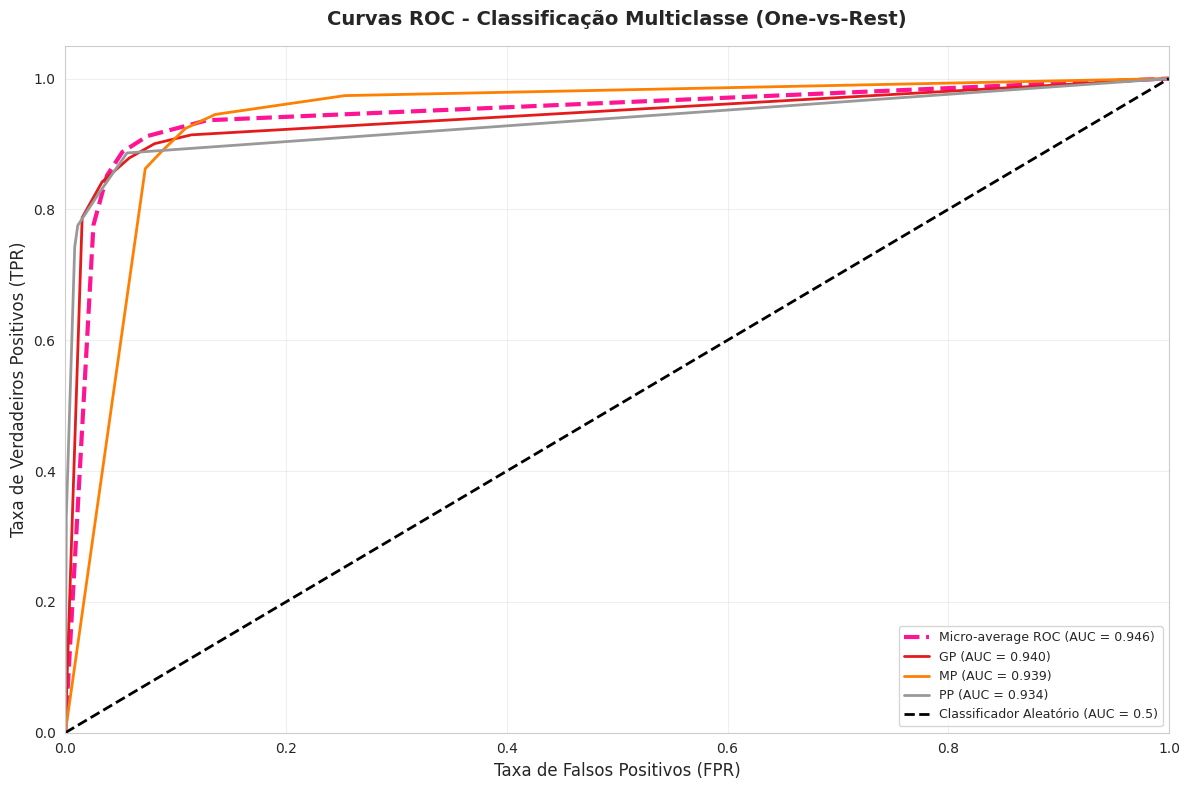


VALORES DE AUC POR CLASSE:
--------------------------------------------------------------------------------
GP                   AUC = 0.9402
MP                   AUC = 0.9386
PP                   AUC = 0.9338

Micro-Average        AUC = 0.9461

INTERPRETAÇÃO DAS CURVAS ROC:
--------------------------------------------------------------------------------

AUC (Area Under Curve): Mede a capacidade do modelo de distinguir entre classes
  - AUC = 1.0: Classificador perfeito
  - AUC = 0.5: Classificador aleatório (não melhor que o acaso)
  - AUC > 0.8: Modelo com boa capacidade discriminativa
  - AUC > 0.9: Modelo com excelente capacidade discriminativa

A curva ROC mostra o trade-off entre:
  - TPR (True Positive Rate / Recall): Sensibilidade do modelo
  - FPR (False Positive Rate): Taxa de falsos alarmes

Quanto mais próxima do canto superior esquerdo, melhor o modelo.



In [35]:
# 3. CURVAS ROC (Receiver Operating Characteristic)
print("=" * 80)
print("3. CURVAS ROC - ANÁLISE MULTICLASSE")
print("=" * 80)

# Obter os nomes das classes do LabelEncoder
class_names_roc = le.classes_

# Binarizar as classes para análise One-vs-Rest (OvR)
n_classes = len(class_names_roc)
y_test_bin = label_binarize(y_test_class, classes=range(n_classes))

# Calcular ROC curve e AUC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular micro-average ROC curve e AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_proba_test.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plotar curvas ROC
plt.figure(figsize=(12, 8))

# Curva micro-average
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC (AUC = {roc_auc["micro"]:.3f})',
         color='deeppink', linestyle='--', linewidth=3)

# Curvas por classe
colors = plt.cm.Set1(np.linspace(0, 1, n_classes))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_names_roc[i]} (AUC = {roc_auc[i]:.3f})')

# Linha de referência (classificador aleatório)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Classificador Aleatório (AUC = 0.5)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=12)
plt.title('Curvas ROC - Classificação Multiclasse (One-vs-Rest)', 
          fontsize=14, fontweight='bold', pad=15)
plt.legend(loc="lower right", fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nVALORES DE AUC POR CLASSE:")
print("-" * 80)
for i, class_name in enumerate(class_names_roc):
    print(f"{class_name:<20} AUC = {roc_auc[i]:.4f}")
print(f"\n{'Micro-Average':<20} AUC = {roc_auc['micro']:.4f}")
print("=" * 80)

print("\nINTERPRETAÇÃO DAS CURVAS ROC:")
print("-" * 80)
print("""
AUC (Area Under Curve): Mede a capacidade do modelo de distinguir entre classes
  - AUC = 1.0: Classificador perfeito
  - AUC = 0.5: Classificador aleatório (não melhor que o acaso)
  - AUC > 0.8: Modelo com boa capacidade discriminativa
  - AUC > 0.9: Modelo com excelente capacidade discriminativa

A curva ROC mostra o trade-off entre:
  - TPR (True Positive Rate / Recall): Sensibilidade do modelo
  - FPR (False Positive Rate): Taxa de falsos alarmes
  
Quanto mais próxima do canto superior esquerdo, melhor o modelo.
""")

## 3.6 Conclusões e Aplicabilidade do Modelo

4. CURVAS PRECISÃO-RECALL - ANÁLISE MULTICLASSE


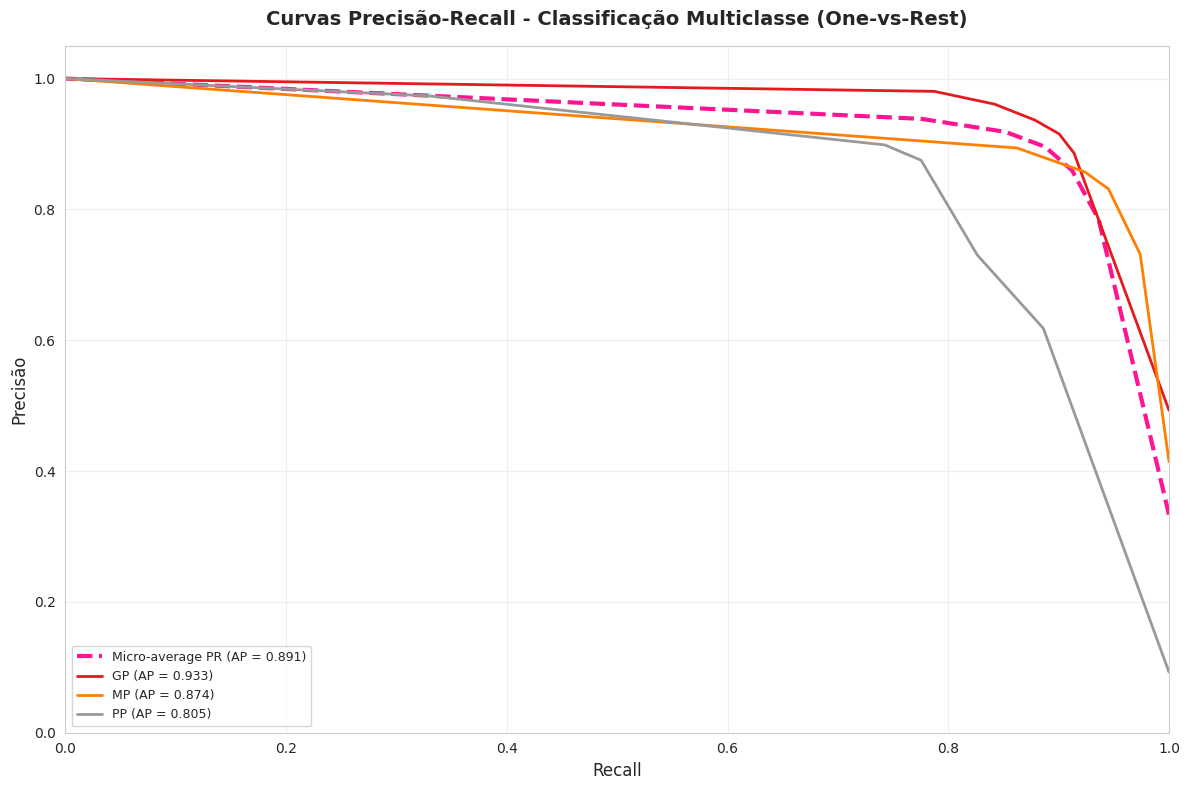


VALORES DE AVERAGE PRECISION (AP) POR CLASSE:
--------------------------------------------------------------------------------
GP                   AP = 0.9331
MP                   AP = 0.8737
PP                   AP = 0.8054

Micro-Average        AP = 0.8911

INTERPRETAÇÃO DAS CURVAS PRECISÃO-RECALL:
--------------------------------------------------------------------------------

Average Precision (AP): Resumo da curva Precisão-Recall
  - AP = 1.0: Classificador perfeito
  - AP alto: Modelo mantém alta precisão mesmo com recall crescente

As curvas Precisão-Recall são especialmente úteis quando:
  - As classes estão desbalanceadas
  - O foco está em minimizar falsos positivos (alta precisão)
  - Queremos entender o trade-off entre precisão e recall

Uma curva mais próxima do canto superior direito indica melhor desempenho.
Queda abrupta na precisão indica dificuldade do modelo em manter qualidade
com o aumento do recall.



In [36]:
# 4. CURVAS DE PRECISÃO-RECALL
print("=" * 80)
print("4. CURVAS PRECISÃO-RECALL - ANÁLISE MULTICLASSE")
print("=" * 80)

# Obter os nomes das classes do LabelEncoder
class_names_pr = le.classes_

# Usar n_classes da célula anterior ou recalcular
n_classes = len(class_names_pr)

# Calcular Precision-Recall curve e Average Precision para cada classe
precision = dict()
recall = dict()
avg_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_proba_test[:, i])
    avg_precision[i] = average_precision_score(y_test_bin[:, i], y_proba_test[:, i])

# Calcular micro-average Precision-Recall curve
precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin.ravel(), y_proba_test.ravel()
)
avg_precision["micro"] = average_precision_score(y_test_bin, y_proba_test, average="micro")

# Plotar curvas Precision-Recall
plt.figure(figsize=(12, 8))

# Curva micro-average
plt.plot(recall["micro"], precision["micro"],
         label=f'Micro-average PR (AP = {avg_precision["micro"]:.3f})',
         color='deeppink', linestyle='--', linewidth=3)

# Curvas por classe
colors = plt.cm.Set1(np.linspace(0, 1, n_classes))
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'{class_names_pr[i]} (AP = {avg_precision[i]:.3f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precisão', fontsize=12)
plt.title('Curvas Precisão-Recall - Classificação Multiclasse (One-vs-Rest)', 
          fontsize=14, fontweight='bold', pad=15)
plt.legend(loc="lower left", fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nVALORES DE AVERAGE PRECISION (AP) POR CLASSE:")
print("-" * 80)
for i, class_name in enumerate(class_names_pr):
    print(f"{class_name:<20} AP = {avg_precision[i]:.4f}")
print(f"\n{'Micro-Average':<20} AP = {avg_precision['micro']:.4f}")
print("=" * 80)

print("\nINTERPRETAÇÃO DAS CURVAS PRECISÃO-RECALL:")
print("-" * 80)
print("""
Average Precision (AP): Resumo da curva Precisão-Recall
  - AP = 1.0: Classificador perfeito
  - AP alto: Modelo mantém alta precisão mesmo com recall crescente
  
As curvas Precisão-Recall são especialmente úteis quando:
  - As classes estão desbalanceadas
  - O foco está em minimizar falsos positivos (alta precisão)
  - Queremos entender o trade-off entre precisão e recall
  
Uma curva mais próxima do canto superior direito indica melhor desempenho.
Queda abrupta na precisão indica dificuldade do modelo em manter qualidade
com o aumento do recall.
""")

# RESUMO FINAL DA AVALIAÇÃO DO MODELO
print("=" * 80)
print("RESUMO FINAL - AVALIAÇÃO DO MODELO DE CLASSIFICAÇÃO KNN")
print("=" * 80)

print(f"""
MODELO: K-Nearest Neighbors (KNN)
- Número de vizinhos: {knn_classifier.n_neighbors}
- Métrica de distância: {knn_classifier.metric}

OBJETIVO: Classificar o porte das árvores (porte_esp) com base em características físicas
- Features utilizadas: altura, copa, DAP, CAP
- Número de classes: {n_classes} ({', '.join(class_names)})

DESEMPENHO GLOBAL (Conjunto de Teste):
- Acurácia: {acc_test:.4f} ({acc_test*100:.2f}%)
- Precisão (Weighted): {prec_test:.4f}
- Recall (Weighted): {rec_test:.4f}
- F1-Score (Weighted): {f1_test:.4f}
- AUC Micro-Average: {roc_auc['micro']:.4f}
- Average Precision Micro: {avg_precision['micro']:.4f}

DESEMPENHO POR CLASSE (Top 3 por F1-Score):
""")

# Ordenar classes por F1-Score
f1_scores_by_class = [(class_names[i], report_dict[class_names[i]]['f1-score']) 
                      for i in range(n_classes)]
f1_scores_by_class.sort(key=lambda x: x[1], reverse=True)

for i, (class_name, f1) in enumerate(f1_scores_by_class[:3], 1):
    class_report = report_dict[class_name]
    print(f"{i}. {class_name}:")
    print(f"   - Precisão: {class_report['precision']:.4f}")
    print(f"   - Recall: {class_report['recall']:.4f}")
    print(f"   - F1-Score: {class_report['f1-score']:.4f}")
    print(f"   - Suporte: {int(class_report['support'])} amostras\n")

print("-" * 80)
print("CONCLUSÕES:")
print("-" * 80)
print(f"""
- O modelo KNN apresentou {'bom' if acc_test > 0.8 else 'razoável' if acc_test > 0.6 else 'baixo'} desempenho geral com acurácia de {acc_test*100:.2f}%
- A análise da matriz de confusão revela os padrões de erro entre classes
- As curvas ROC mostram {'excelente' if roc_auc['micro'] > 0.9 else 'boa' if roc_auc['micro'] > 0.8 else 'razoável'} capacidade discriminativa (AUC = {roc_auc['micro']:.3f})
- As curvas Precisão-Recall indicam o trade-off entre precisão e recall
- Classes com mais amostras tendem a ter melhor desempenho (efeito do balanceamento)

RECOMENDAÇÕES:
- Considerar balanceamento de classes se houver grande disparidade
- Testar outros valores de K para otimizar o desempenho
- Avaliar feature engineering para criar novas características discriminativas
- Comparar com outros algoritmos (Random Forest, SVM, etc.)
""")
print("=" * 80)

# SEÇÃO 4: EXPORTAÇÃO DOS DADOS PROCESSADOS

Esta seção exporta os dados processados para arquivos CSV que serão consumidos pelo backend da aplicação.

**Objetivo:** Salvar os dados limpos e processados em formatos otimizados para consumo pela API backend.

In [37]:
import pandas as pd
import json

print("=" * 80)
print("EXPORTAÇÃO DOS DADOS PARA CSV")
print("=" * 80)

# 1. Exportar dados completos das árvores (sem geometry)
print("\n1. Exportando dados completos das árvores...")
df_export = df_usado.copy()

# Extrair lat/lng da geometria antes de remover
df_export['lng'] = df_export.geometry.x
df_export['lat'] = df_export.geometry.y

# Remover coluna geometry (não pode ser salva em CSV)
df_export = df_export.drop(columns=['geometry'])

# Salvar
df_export.to_csv('censo_arboreo_processed.csv', index=False, encoding='utf-8')
print(f"   ✅ Arquivo salvo: censo_arboreo_processed.csv ({len(df_export)} registros)")

# 2. Exportar estatísticas agregadas por bairro
print("\n2. Exportando estatísticas por bairro...")
bairro_stats = df_usado.groupby('bairro_nome').agg({
    'altura': ['count', 'mean', 'min', 'max', 'median'],
    'dap': ['mean', 'min', 'max', 'median'],
    'copa': ['mean', 'min', 'max', 'median'],
    'cap': ['mean']
}).reset_index()

# Flatten multi-level columns
bairro_stats.columns = ['_'.join(col).strip() if col[1] else col[0] for col in bairro_stats.columns.values]
bairro_stats = bairro_stats.rename(columns={
    'bairro_nome': 'bairro',
    'altura_count': 'quantidade',
    'altura_mean': 'altura_media',
    'altura_min': 'altura_min',
    'altura_max': 'altura_max',
    'altura_median': 'altura_mediana',
    'dap_mean': 'dap_medio',
    'dap_min': 'dap_min',
    'dap_max': 'dap_max',
    'dap_median': 'dap_mediana',
    'copa_mean': 'copa_media',
    'copa_min': 'copa_min',
    'copa_max': 'copa_max',
    'copa_median': 'copa_mediana',
    'cap_mean': 'cap_medio'
})

# Adicionar top 5 espécies por bairro
def get_top_especies(group):
    return group['nome_popul'].value_counts().head(5).to_dict()

top_especies_por_bairro = df_usado.groupby('bairro_nome').apply(get_top_especies).to_dict()
bairro_stats['top_especies_json'] = bairro_stats['bairro'].map(
    lambda x: json.dumps(top_especies_por_bairro.get(x, {}), ensure_ascii=False)
)

# Adicionar distribuição de porte por bairro
def get_porte_distribution(group):
    return group['porte_esp'].value_counts().to_dict()

porte_por_bairro = df_usado.groupby('bairro_nome').apply(get_porte_distribution).to_dict()
bairro_stats['portes_json'] = bairro_stats['bairro'].map(
    lambda x: json.dumps(porte_por_bairro.get(x, {}), ensure_ascii=False)
)

# Adicionar RPA (pegar o valor mais comum)
rpa_por_bairro = df_usado.groupby('bairro_nome')['rpa'].agg(lambda x: x.value_counts().index[0] if len(x) > 0 else '').to_dict()
bairro_stats['rpa'] = bairro_stats['bairro'].map(rpa_por_bairro)

# Salvar
bairro_stats.to_csv('bairro_stats.csv', index=False, encoding='utf-8')
print(f"   ✅ Arquivo salvo: bairro_stats.csv ({len(bairro_stats)} bairros)")

# 3. Exportar estatísticas globais
print("\n3. Exportando estatísticas globais...")
global_stats = {
    'total_arvores': len(df_usado),
    'total_especies': df_usado['nome_popul'].nunique(),
    'altura_media': df_usado['altura'].mean(),
    'altura_min': df_usado['altura'].min(),
    'altura_max': df_usado['altura'].max(),
    'altura_mediana': df_usado['altura'].median(),
    'dap_medio': df_usado['dap'].mean(),
    'dap_min': df_usado['dap'].min(),
    'dap_max': df_usado['dap'].max(),
    'dap_mediana': df_usado['dap'].median(),
    'copa_media': df_usado['copa'].mean(),
    'copa_min': df_usado['copa'].min(),
    'copa_max': df_usado['copa'].max(),
    'copa_mediana': df_usado['copa'].median(),
}

# Adicionar distribuições
distribuicao_porte = df_usado['porte_esp'].value_counts().to_dict()
distribuicao_rpa = df_usado['rpa'].value_counts().to_dict()
distribuicao_tipologia = df_usado['tipologia'].value_counts().to_dict() if 'tipologia' in df_usado.columns else {}
top_10_especies = df_usado['nome_popul'].value_counts().head(10).to_dict()

global_stats['distribuicao_porte_json'] = json.dumps(distribuicao_porte, ensure_ascii=False)
global_stats['distribuicao_rpa_json'] = json.dumps(distribuicao_rpa, ensure_ascii=False)
global_stats['distribuicao_tipologia_json'] = json.dumps(distribuicao_tipologia, ensure_ascii=False)
global_stats['top_10_especies_json'] = json.dumps(top_10_especies, ensure_ascii=False)

global_stats_df = pd.DataFrame([global_stats])
global_stats_df.to_csv('global_stats.csv', index=False, encoding='utf-8')
print(f"   ✅ Arquivo salvo: global_stats.csv")

# 4. Exportar dados simplificados para heatmap (amostra)
print("\n4. Exportando dados para heatmap (amostra de 10.000 pontos)...")
sample_size = min(10000, len(df_usado))
df_heatmap = df_usado.sample(n=sample_size, random_state=42)[['bairro_nome', 'nome_popul', 'altura', 'dap']].copy()
df_heatmap['lng'] = df_usado.sample(n=sample_size, random_state=42).geometry.x.values
df_heatmap['lat'] = df_usado.sample(n=sample_size, random_state=42).geometry.y.values
df_heatmap.to_csv('heatmap_data.csv', index=False, encoding='utf-8')
print(f"   ✅ Arquivo salvo: heatmap_data.csv ({len(df_heatmap)} pontos)")

print("\n" + "=" * 80)
print("EXPORTAÇÃO CONCLUÍDA!")
print("=" * 80)
print("""
Arquivos gerados:
  1. censo_arboreo_processed.csv - Dados completos das árvores (com lat/lng)
  2. bairro_stats.csv - Estatísticas agregadas por bairro
  3. global_stats.csv - Estatísticas globais do censo
  4. heatmap_data.csv - Dados simplificados para visualização de heatmap

Próximos passos:
  - Atualizar backend para ler esses CSVs
  - Implementar endpoints da API
  - Testar integração com frontend
""")
print("=" * 80)

EXPORTAÇÃO DOS DADOS PARA CSV

1. Exportando dados completos das árvores...
   ✅ Arquivo salvo: censo_arboreo_processed.csv (13785 registros)

2. Exportando estatísticas por bairro...
   ✅ Arquivo salvo: bairro_stats.csv (52 bairros)

3. Exportando estatísticas globais...
   ✅ Arquivo salvo: global_stats.csv

4. Exportando dados para heatmap (amostra de 10.000 pontos)...
   ✅ Arquivo salvo: heatmap_data.csv (10000 pontos)

EXPORTAÇÃO CONCLUÍDA!

Arquivos gerados:
  1. censo_arboreo_processed.csv - Dados completos das árvores (com lat/lng)
  2. bairro_stats.csv - Estatísticas agregadas por bairro
  3. global_stats.csv - Estatísticas globais do censo
  4. heatmap_data.csv - Dados simplificados para visualização de heatmap

Próximos passos:
  - Atualizar backend para ler esses CSVs
  - Implementar endpoints da API
  - Testar integração com frontend

